# City of Toronto Zoning By-Law Data

The City of Toronto's Zoning By-law dataset, available on the Open Data Portal, provides information on zoning regulations within the city. This dataset is essential for understanding land use designations, building requirements, and permissible activities across different zones in Toronto. It serves as a valuable resource for urban planners, developers, and residents interested in the city's zoning framework.

The dataset includes the following details:
1. Zone Classifications: Categories such as residential, commercial, industrial, and mixed-use zones with subcategories that further define land use within each zone.
2. Permitted Uses: Lists of activities allowed in each zone (e.g., residential dwellings, retail spaces, or manufacturing facilities).
3. Holding status for the zone.
5. Building Regulations: Maximum building heights, floor area ratios, maximum number of dwelling units, and density limits. Setback requirements and lot coverage specifications.
6. Overlay zones: Additional regulations for specific areas, like heritage conservation districts or floodplains.
7. Special Exceptions to zoning rules.
8. Geospatial data that includes zoning boundries and spatial attributes.
9. Administrative details: Relevant by-law numbers and dates of enactment, as well as links to related municipal policies or amendments.

Accessing this dataset can aid in making informed decisions regarding property development, compliance with zoning laws, and understanding the urban planning landscape of Toronto. In these sets of codes, it will assist in classifying wards in Toronto as low, medium, or high risk for collisions by adding features to assist in predicting the classification.

Only current zoning data is available for City of Toronto, therefore it is assumed that this zoning data is valid for all years that the other datasets are from. 

## Setup Notebook

In [156]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import City of Toronto Zoning By-Law Geojson File

A GeoJSON file is a geospatial data format based on JSON (JavaScript Object Notation). It is used to represent geographic features, their attributes, and their spatial extents. This GeoJSON file is a contains 11,719 rows, each representing a zoning area in the City of Toronto. Each feature includes properties like zoning classifications, frontage, density, and coverage, alongside geometries like MultiPolygon for spatial representation.

In [159]:
# Import dataset as a geoDataFrame
zoning_data = gpd.read_file('Zoning Area - 4326.geojson')

# View geoDataFrame
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,ZN_HOLDING,HOLDING_ID,FRONTAGE,ZN_AREA,UNITS,DENSITY,COVERAGE,...,ZN_EXCPTN,EXCPTN_NO,STAND_SET,ZN_STATUS,ZN_STRING,AREA_UNITS,ZBL_CHAPT,ZBL_SECTN,ZBL_EXCPTN,geometry
0,1,2,UT,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,2,UT,-1.0,100,100.10,,"MULTIPOLYGON (((-79.2097 43.81729, -79.20961 4..."
1,2,1,ON,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,0,ON,-1.0,90,90.20,,"MULTIPOLYGON (((-79.50273 43.70976, -79.50195 ..."
2,3,0,RD,N,0,14.0,510,0,0.0,0.0,...,Y,1058,-1,2,RD (f14.0; a510) (x1058),0.0,10,10.20,900.3.10(1058),"MULTIPOLYGON (((-79.27433 43.80068, -79.27425 ..."
3,4,1,O,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,3,O,-1.0,90,90.10,,"MULTIPOLYGON (((-79.5704 43.72175, -79.57042 4..."
4,5,0,RD,N,0,0.0,0,0,0.0,0.0,...,Y,1040,-1,2,RD (x1040),0.0,10,10.20,900.3.10(1040),"MULTIPOLYGON (((-79.26202 43.81195, -79.26214 ..."


Creating a Folium map of this data allows one to visually explore and interact with the zoning areas, making it easier to understand spatial relationships, patterns, and distributions. Therefore, let's create a folium map centered on Toronto for the zones. 

In [161]:
# # Define Toronto's latitude and longitude
# toronto_coords = [43.65107, -79.347015]

# # Create a folium map centered on Toronto
# m = folium.Map(location=toronto_coords, zoom_start=12)

# # Add the GeoJSON layer to the map
# folium.GeoJson(
#     zoning_data,
#     name='Zoning Areas'
# ).add_to(m)

# # Add a layer control panel
# folium.LayerControl().add_to(m)

# # Display the map
# m

We can see that there is a lot of zones in the City of Toronto (11719). Now let's analyze that data in the dataset. 

## Data Analysis

Let's exploring the zoning data columns (features).

In [165]:
# Check the number of columns and rows
zoning_data.shape

(11719, 25)

In [166]:
# Check the columns in geoDataFrame
zoning_data.columns

Index(['_id', 'GEN_ZONE', 'ZN_ZONE', 'ZN_HOLDING', 'HOLDING_ID', 'FRONTAGE',
       'ZN_AREA', 'UNITS', 'DENSITY', 'COVERAGE', 'FSI_TOTAL', 'PRCNT_COMM',
       'PRCNT_RES', 'PRCNT_EMMP', 'PRCNT_OFFC', 'ZN_EXCPTN', 'EXCPTN_NO',
       'STAND_SET', 'ZN_STATUS', 'ZN_STRING', 'AREA_UNITS', 'ZBL_CHAPT',
       'ZBL_SECTN', 'ZBL_EXCPTN', 'geometry'],
      dtype='object')

From the website that this data was obtained from (https://open.toronto.ca/dataset/zoning-by-law/), the columns describe the following:

- '_id': Unique row identifier for Open Data database.
- 'GEN_ZONE': The land use category of the lands within the zone boundary. Each 'zone category' has its own Chapter in the text of By-law 569-2013. 0 = Residential 1 = Open Space 2 = Utility and Transportation 4 = Employment Industrial 5 = Institutional 6 = Commercial Residential Employment 101 = Residential Apartment 201 = Commercial 202 = Commercial Residential
- 'ZN_ZONE': The land use category of the lands within the zone boundary. Each 'zone category' has its own Chapter in the text of By-law 569-2013. 
- 'ZN_HOLDING':To indicate whether there is a HOLDING status for the zone. The zone label will be prefaced by the letter (H). These are not common, and when used, a Holding Zone is most often applied to specific sites. Yes (Y) or No (N)
- 'HOLDING_ID': Holding number if it exists.
- 'FRONTAGE': The required minimum Lot Frontage in the zone, and is a numeric value prefaced by the letter 'f' within a residential zone label. Unit = metres
- 'ZN_AREA':The required minimum Lot Area in the zone, and is a numeric value prefaced by the letter 'a' within a residential zone. Unit = square metres
- 'UNITS': The permitted maximum number of Dwelling Units allowed on a lot in the zone, and is a numeric value prefaced by the letter 'u' in a residential zone.
- 'DENSITY': The permitted maximum Density in the zone by FSI (floor space index), and is a numeric value prefaced by the letter 'd' in residential zones.
- 'COVERAGE': The permitted maximum percentage of a lot that can be covered by any part of any building or structure on or above the surface of the lot. Unit = % (percent)
- 'FSI_TOTAL': The permitted maximum FSI (floor space index) Total in the zone. It is a numeric value following the zone symbol.
- 'PRCNT_COMM': The permitted maximum FSI (floor space index) for Commercial Use in most mixed-use zones, and is a numeric value prefaced by letter 'c' in the zone label.
- 'PRCNT_RES': The permitted maximum FSI (floor space index) for Residential Use in most mixed-use zones, and is a numeric value prefaced by the letter 'r' in the zone label.
- 'PRCNT_EMMP': The permitted maximum FSI (floor space index) for Employment Uses in the zone, and is a numeric value prefaced by the letter 'e' in the zone label.
- 'PRCNT_OFFC': The permitted maximum FSI (floor space index) for Office Uses in an Employment-Office zone, and is a numeric value prefaced by the letter 'o' in the zone label.
- 'ZN_EXCPTN': This indicates whether a zone has an Exception. Yes (Y) or No (N)
- 'EXCPTN_NO': This is the Exception Number for the zone if one exists. The exception number is prefaced by the letter 'x' in the zone label. Each zone has its own series of exception numbers, starting at 1, so the exception number must be read in conjunction with the respective zone symbol.
- 'STAND_SET': Set of standards referred to in the Commercial-Residential mixed use zone, based on three different design typologies. The 'standard set' number is prefaced by the letters 'SS' in the zone label.
- 'ZN_STATUS': Status of the Zone, primarily indicating whether the lands have been incorporated into By-law 569-2013 or not. 0-4 and 6 = In the By-law. 5 = Not Part of Zoning By-law 569-2013
- 'ZN_STRING': Complete label of the zone.
- 'AREA_UNITS': This is also a type of density limit, indicating the required minimum lot area per dwelling unit on a lot in the zone. Unit = square metres.
- 'ZBL_CHAPT': By-law text chapter number
- 'ZBL_SECTN': By-law text section number
- 'ZBL_EXCPTN': By-law text exception number

Most of the features will not represent any correlation to traffic collision data, therefore, they can be dropped. The following columns are dropped:

'ZN_HOLDING' and 'HOLDING_ID': These features have nothing to do with collision data because they pertain to zoning regulations, specifically indicating if a zone has a "holding" status. Holding zones are typically used in urban planning to manage land development under specific conditions, which is unrelated to collision factors that directly influence collision occurrences.

'FRONTAGE' and 'ZN_AREA': These features have no direct relation to collision data because they describe land-use regulations, specifically the minimum dimensions for lot frontage and area within a zoning context.  These are relevant to urban planning and property development, which is unrelated to collision factors that directly influence collision occurrences.

'COVERAGE': All rows in the coverage column are zero, therefore no information is being provided by this feature. 

'PRCNT_COMM', 'PRCNT_RES','PRCNT_EMMP', and 'PRCNT_OFFC': The FSI_Total will present the permitted maximum FSI (floor space index) total in the zone. Therefore, the remaining columns containing FSI values are redundant. 

'ZN_EXCPTN', 'EXCPTN_NO': These features are unrelated to collision data because they refer to specific exceptions or modifications within zoning regulations, such as unique land-use permissions or restrictions. These are administrative and legal attributes tied to land, which is unrelated to collision factors that directly influence collision occurrences.

'STAND_SET': This feature is unrelated to collision data because it pertains to design standards for Commercial-Residential mixed-use zones, focusing on architectural or urban planning typologies.

'ZN_STATUS' and 'ZN_STRING': These features are unrelated to collision data because they provide administrative and descriptive details about zoning regulations, such as whether the zone falls under a specific by-law and the zone's complete label. 

'ZBL_CHAPT', 'ZBL_SECTN', and 'ZBL_EXCPTN': These features are unrelated to collision data because they reference specific chapters, sections, and exceptions within zoning by-law documentation. 

In [169]:
# Drop uncorrelated and unnecessary columns 
zoning_data = zoning_data.drop(columns = [
   'ZN_HOLDING', 'HOLDING_ID', 'FRONTAGE', 'ZN_AREA', 'COVERAGE',
    'PRCNT_COMM', 'PRCNT_RES', 'PRCNT_EMMP', 'PRCNT_OFFC',
    'ZN_EXCPTN', 'EXCPTN_NO', 'STAND_SET', 'ZN_STATUS', 'ZN_STRING',
    'ZBL_CHAPT', 'ZBL_SECTN', 'ZBL_EXCPTN'
    ], errors='ignore')

In [170]:
# Check if columns are removed
zoning_data.columns

Index(['_id', 'GEN_ZONE', 'ZN_ZONE', 'UNITS', 'DENSITY', 'FSI_TOTAL',
       'AREA_UNITS', 'geometry'],
      dtype='object')

In [171]:
# Check data types per column
print(zoning_data.dtypes)

_id              int32
GEN_ZONE         int32
ZN_ZONE         object
UNITS            int32
DENSITY        float64
FSI_TOTAL      float64
AREA_UNITS     float64
geometry      geometry
dtype: object


From the description of each feature, it is clear 'GEN_ZONE' uses numbers to classify the land type. These numbers serve as categorical labels rather than quantitative values. To ensure they are not mistakenly treated as numeric data during analysis, object descriptions will be added to make it more clear and in a proper format. The decriptions are as follows: . 0 = Residential 1 = Open Space 2 = Utility and Transportation 4 = Employment Industrial 5 = Institutional 6 = Commercial Residential Employment 101 = Residential Apartment 201 = Commercial 202 = Commercial Residential

In [173]:
# Descriptions of GEN_ZONE labels
zone_labels = {
    0: "Residential",
    1: "Open Space",
    2: "Utility and Transportation",
    4: "Employment Industrial",
    5: "Institutional",
    6: "Commercial Residential Employment",
    101: "Residential Apartment",
    201: "Commercial",
    202: "Commercial Residential"
}

# Replace numerical values in GEN_ZONE column with descriptive labels
if 'GEN_ZONE' in zoning_data.columns:
    zoning_data['GEN_ZONE'] = zoning_data['GEN_ZONE'].replace(zone_labels)

# View DataFrame
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,UNITS,DENSITY,FSI_TOTAL,AREA_UNITS,geometry
0,1,Utility and Transportation,UT,-1,-1.0,-1.0,-1.0,"MULTIPOLYGON (((-79.2097 43.81729, -79.20961 4..."
1,2,Open Space,ON,-1,-1.0,-1.0,-1.0,"MULTIPOLYGON (((-79.50273 43.70976, -79.50195 ..."
2,3,Residential,RD,0,0.0,-1.0,0.0,"MULTIPOLYGON (((-79.27433 43.80068, -79.27425 ..."
3,4,Open Space,O,-1,-1.0,-1.0,-1.0,"MULTIPOLYGON (((-79.5704 43.72175, -79.57042 4..."
4,5,Residential,RD,0,0.0,-1.0,0.0,"MULTIPOLYGON (((-79.26202 43.81195, -79.26214 ..."


Now let's look at the information from the 'ZN_ZONE' feature.

In [175]:
# Let's look at 'ZN_Zone' data values
zoning_data['ZN_ZONE'].unique()

array(['UT', 'ON', 'RD', 'O', 'RM', 'RT', 'RS', 'OR', 'E', 'EL', 'CL',
       'CR', 'EH', 'RA', 'CRE', 'OC', 'I', 'R', 'RAC', 'IPW', 'EO', 'OG',
       'IE', 'IH', 'OM', 'IS'], dtype=object)

In the City of Toronto's Zoning By-law 569-2013, zoning codes are used to designate specific land uses and development standards. Understanding these abbreviations is crucial for interpreting zoning regulations. Below is a list of the zoning abbreviations and their meanings:

- R: Residential Zone
- RD: Residential Detached Zone
- RS: Residential Semi-Detached Zone
- RT: Residential Townhouse Zone
- RM: Residential Multiple-Dwelling Zone
- RA: Residential Apartment Zone
- RAC: Residential Apartment Commercial Zone
- CR: Commercial Residential Zone
- CRE: Commercial Residential Employment Zone
- E: Employment Industrial Zone
- EL: Employment Light Industrial Zone
- EH: Employment Heavy Industrial Zone
- EO: Employment Office Zone
- I: Institutional Zone
- IE: Industrial Employment
- IH: Industrial Heavy
- IP:Industrial Park Warehousing
- IS:  Institutional Services
- O: Open Space Zone
- OC: Open Space - Conservation Zone
- OG: Open Space - Greenbelt
- OM: Open Space - Managed
- ON: Open Space Natural Zone
- OR: Open Space Recreation Zone
- UT: Utility and Transportation Zone
- CL: Commercial Local Zone

Each zoning code specifies the permitted uses, building types, densities, and other development standards applicable to properties within that zone. 

Let's now take a look at the remaining numerical columns. 

In [177]:
# Check numerical statistics for each column
zoning_data.describe()

,_id,UNITS,DENSITY,FSI_TOTAL,AREA_UNITS
count,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000
mean,5860.000000,1.867565,-0.246600,-0.223988,7.508909
std,3383.128237,25.405069,0.808751,1.688457,38.472827
min,1.000000,-1.000000,-2.000000,-3.000000,-1.000000
25%,2930.500000,-1.000000,-1.000000,-1.000000,-1.000000
50%,5860.000000,0.000000,0.000000,-1.000000,0.000000
75%,8789.500000,0.000000,0.000000,-1.000000,0.000000
max,11719.000000,988.000000,11.000000,30.000000,457.000000


We see some negative minimum values for all of these columns, let's determine the number of negative values.

In [179]:
# Count the number of negative values in each column
negative_counts = (zoning_data.select_dtypes(include=['number']) < 0).sum()

# Display the counts
print(negative_counts)

_id              0
UNITS         5332
DENSITY       5070
FSI_TOTAL     8841
AREA_UNITS    5373
dtype: int64


Almost half of the rows of UNITS, DENSITY and AREA_UNITS is negative and over half of FSI_TOTAL values are negative. Huh, this is weird. A search online brought up no information about how this is possible or why this is happening. At first, it was assumed that -1 represents 0 units, density, floor size index (FSI) and area units, but there a quick code below shows that there are 0 values as well. In addition, there are more negative numbers than -1, as seen below for DENSITY and AREA UNITS. 

In [181]:
# Count the number of negative values in each column
negative_counts = (zoning_data.select_dtypes(include=['number']) == 0).sum()

# Display the counts
print(negative_counts)

_id              0
UNITS         5734
DENSITY       4460
FSI_TOTAL       48
AREA_UNITS    5717
dtype: int64


In [182]:
# Display the range of negative values for each column
for column in zoning_data.select_dtypes(include=['number']).columns:
    negative_values = zoning_data[column][zoning_data[column] < 0]
    
    if not negative_values.empty:  
        min_value = negative_values.min()
        max_value = negative_values.max()
        count = len(negative_values)
        
        print(column)
        print({min_value}, {max_value})

UNITS
{-1} {-1}
DENSITY
{-2.0} {-1.0}
FSI_TOTAL
{-3.0} {-1.0}
AREA_UNITS
{-1.0} {-1.0}


The next idea could be that negative values represent a certain zone type, for example there is no density or units for an open space. Therefore let's examine the amount of negative values per zone (GEN_ZONE). 

In [184]:
# Check for negative values in the columns and return GEN_ZONE
for column in ['UNITS', 'DENSITY', 'FSI_TOTAL', 'AREA_UNITS']:
    
    # Get rows where the column has negative values
    negative_values = zoning_data[zoning_data[column] < 0]
    
    print(column)
    
    # Return the corresponding GEN_ZONE for negative values
    if 'GEN_ZONE' in zoning_data.columns:
        print(f"GEN_ZONE values for negative {column}:\n{negative_values[['GEN_ZONE', column]].value_counts()}\n")
        

UNITS
GEN_ZONE values for negative UNITS:
GEN_ZONE                           UNITS
Commercial Residential             -1       2162
Open Space                         -1       1576
Employment Industrial              -1        606
Residential                        -1        328
Institutional                      -1        222
Commercial                         -1        133
Utility and Transportation         -1        120
Residential Apartment              -1         95
Commercial Residential Employment  -1         90
Name: count, dtype: int64

DENSITY
GEN_ZONE values for negative DENSITY:
GEN_ZONE                           DENSITY
Commercial Residential             -1.0       2157
Open Space                         -1.0       1576
Employment Industrial              -1.0        592
Residential                        -1.0        270
Commercial                         -1.0        133
Utility and Transportation         -1.0        120
Commercial Residential Employment  -1.0         90
Res

There are negative values across all area types. Therefore, the negative values cannot be impeded or replaced in any way or has any logical reason behind the values. Therefore, the features will have to be dropped. 

In [186]:
# Drop uncorrelated and unnecessary columns 
zoning_data = zoning_data.drop(columns = [
   'UNITS', 'DENSITY', 'FSI_TOTAL', 'AREA_UNITS'
    ], errors='ignore')

In [187]:
# Check if columns are removed
zoning_data.columns

Index(['_id', 'GEN_ZONE', 'ZN_ZONE', 'geometry'], dtype='object')

## Data Cleaning

Data cleaning is essential to ensure datasets are accurate, consistent, and free of errors, which improves the reliability of the dataset. It prevents distorted results, enhances performance, and ensures data is easy to interpret and use effectively. The first step is to check if there is missing (null) or duplicated values in the dataset. 

In [190]:
# Check for missing values
print(zoning_data.isnull().sum())

_id         0
GEN_ZONE    0
ZN_ZONE     0
geometry    0
dtype: int64


In [191]:
# Check for duplicates
zoning_data.duplicated().sum()

0

There are no null values or duplicates in this dataset. Since this is all categorical data, there are no outliers in the numeric data to be investigated. 

## EDA

Let's plot the features to see the distributions.

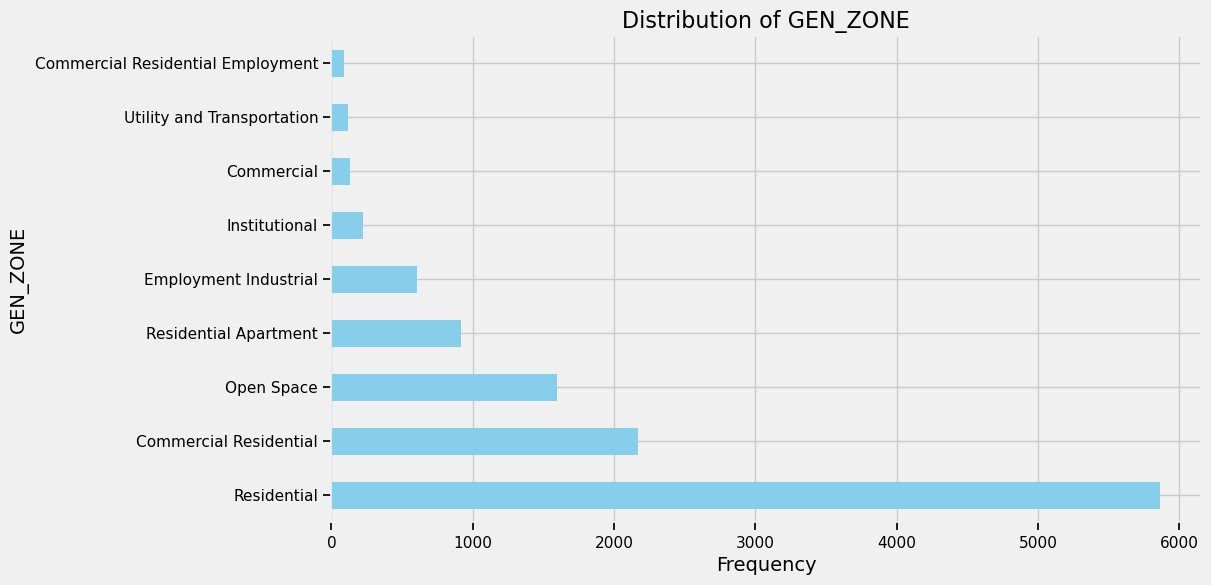

In [195]:
# Plot distribution of features 
plt.figure(figsize=(10, 6))
zoning_data['GEN_ZONE'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Distribution of GEN_ZONE', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('GEN_ZONE', fontsize=14)
plt.show()

The trends observed in the distribution of zoning classifications in the City of Toronto are due to the city’s urban planning priorities, housing demand, and economic development strategies. Ontario’s Growth Plan for the Greater Golden Horseshoe mandates higher-density development and compact urban growth, shaping Toronto's zoning priorities. 
- Residential zones are dominating because the city has prioritized housing to accommodate its rapidly growing population, bringing a high demand for housing.
- The high level of Commercial Residential zones reflects Toronto’s push toward mixed-use neighborhoods to create vibrant, walkable communities. This also described why the commercial zones are so low, since Toronto has increasingly focused on integrating commercial uses with residential.
- The high level of open space zones is because Toronto emphasizes environmental conservation and recreation by preserving green spaces and parks.
- Utility and Transportation zones are low because the specific infrastructure for transportation (rail yards, subway stations, highways) make up a small portion of the city's land, as they are not widespread compared to residential or mixed-use areas.
- Commercial Residential Employment zones are extremely low because it is a relatively new zoning classification introduced to promote mixed-use developments with a focus on employment. Its low frequency reflects its gradual adoption, as older zoning classifications are still in effect in many parts of the city.

[]

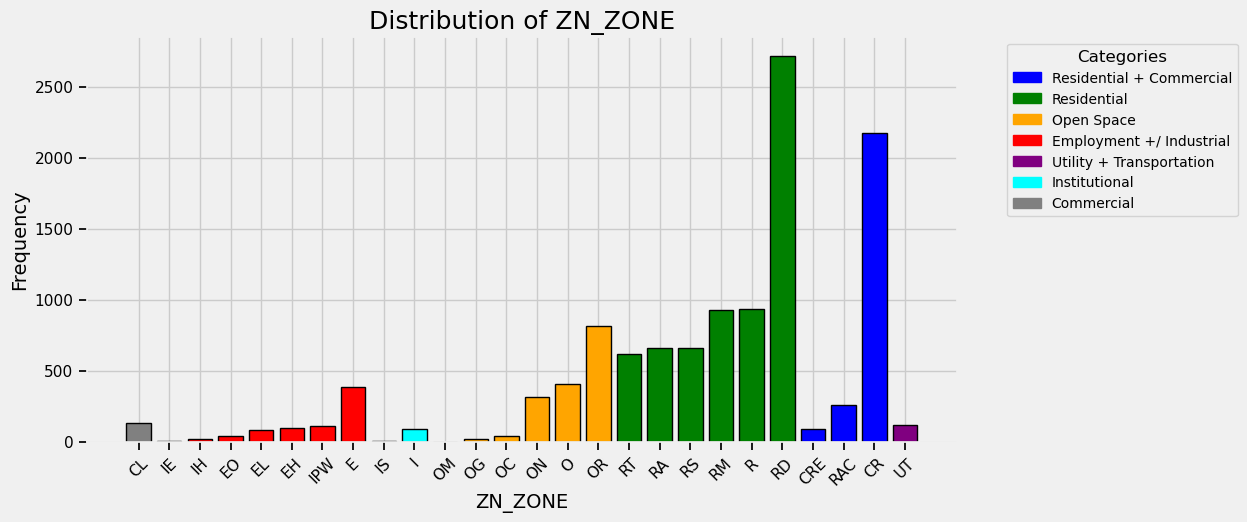

In [197]:
# Define categories and groupings
categories = {
    'Residential + Commercial': ['CRE', 'CR', 'RAC'],
    'Residential': ['R', 'RM', 'RD', 'RS', 'RA', 'RT'],
    'Open Space': ['O', 'ON', 'OG', 'OC', 'OM', 'OR'],
    'Employment +/ Industrial': ['E', 'EL', 'EH', 'EO', 'IE', 'IH', 'IP', 'IPW'],
    'Utility + Transportation': ['UT'],
    'Institutional': ['IS', 'I'],
    'Commercial': ['CL']
}

# Define color coding for the categories
category_colors = {
    'Residential + Commercial': 'blue',
    'Residential': 'green',
    'Open Space': 'orange',
    'Employment +/ Industrial': 'red',
    'Utility + Transportation': 'purple',
    'Institutional': 'cyan',
    'Commercial': 'gray'
}

# Count frequencies of ZN_ZONE
zone_counts = zoning_data['ZN_ZONE'].value_counts().reset_index()
zone_counts.columns = ['ZN_ZONE', 'Frequency']

# Map ZN_ZONE to categories
zone_counts['Category'] = zone_counts['ZN_ZONE'].apply(
    lambda x: next((key for key, values in categories.items() if x in values), 'Other')
)

# Assign the appropriate category colors
zone_counts['Color'] = zone_counts['Category'].map(category_colors)

# Sort the data by category and frequency
zone_counts = zone_counts.sort_values(by=['Category', 'Frequency'], ascending=[True, True])

# Plot the data
plt.figure(figsize=(10, 5))
bars = plt.bar(
    zone_counts['ZN_ZONE'], 
    zone_counts['Frequency'], 
    color=zone_counts['Color'], 
    edgecolor='black'
)

# Add title, labels, and gridlines
plt.title('Distribution of ZN_ZONE', fontsize=18)
plt.xlabel('ZN_ZONE', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  

# Add legend for categories
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
plt.legend(handles=handles, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.plot()

Observation for GEN_ZONE:

The trends observed in the distribution of zoning types (ZN_ZONE) in the City of Toronto reflect the city’s urban planning goals, historical land use, and development priorities. 

- Residential Detached (RD) zones are dominating because detached single-family homes have historically been the most common housing type in Toronto. These zones cater to families and make up the bulk of residential neighborhoods.
- There is a significant presence of Commercial Residential (CR) zones reflect Toronto’s push toward integrating residential and commercial uses, especially in downtown. Mixed-use zoning fosters walkable communities, reduces car usage, and aligns with sustainable urban growth principles.
- CRE, IS, OM and OG have low frequency because these zones represent either niche land uses (e.g., cemeteries, heritage properties) or newer categories like CRE (Commercial Residential Employment), which are gradually being applied as older zones are updated.

We now want to determine the total area for each zone using GEN_ZONE only.

In [200]:
# Convert to EPSG:32617
zoning_data = zoning_data.to_crs(epsg=32617)

# Calculate the area for each polygon in meters squared
zoning_data['Area_m2'] = zoning_data['geometry'].area  

# Display the result
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,geometry,Area_m2
0,1,Utility and Transportation,UT,"MULTIPOLYGON (((643976.844 4853137.893, 643984...",1108.781156
1,2,Open Space,ON,"MULTIPOLYGON (((620626.556 4840726.078, 620689...",27616.045030
2,3,Residential,RD,"MULTIPOLYGON (((638817.665 4851182.615, 638823...",4062.776543
3,4,Open Space,O,"MULTIPOLYGON (((615151.959 4841962.396, 615149...",808.357774
4,5,Residential,RD,"MULTIPOLYGON (((639780.906 4852455.19, 639770....",3984.534186


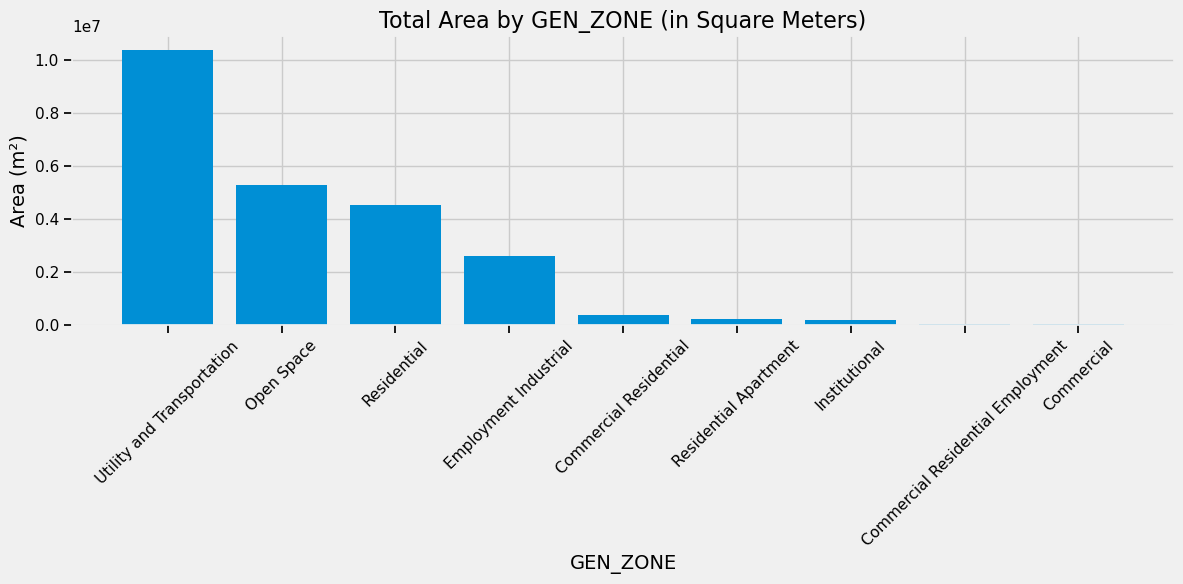

In [201]:
# Sort the data for better visualization (optional)
zoning_data = zoning_data.sort_values(by='Area_m2', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(zoning_data['GEN_ZONE'], zoning_data['Area_m2'])

# Add labels and title
plt.title('Total Area by GEN_ZONE (in Square Meters)', fontsize=16)
plt.xlabel('GEN_ZONE', fontsize=14)
plt.ylabel('Area (m²)', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

## Import City of Toronto Ward Shapefile

This dataset contains the City of Toronto ward boundaries in the WGS84 coordinate system. It has already been cleaned in a notebook at this path: New_Project_Directory/CME538_Big-Project_Hackstreet-Boys/Ward Data/Ward Data.ipynb. It is being imported from this path: CME538_Big-Project_Hackstreet-Boys/Clean Data/wards_data.geojson

In [209]:
# Path to the GeoJSON file
geojson_path = "../Clean Data/wards_data.geojson"

# Load the shapefile
wards_data = gpd.read_file(geojson_path)

# View geoDataFrame
wards_data.head()

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,2551044,WD18,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,2551048,WD18,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,2551052,WD18,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,2551056,WD18,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


## Combine the Files to One File using Geospatial Relationships and Operations

Let's look at the geometry of both of the files. 

<Axes: >

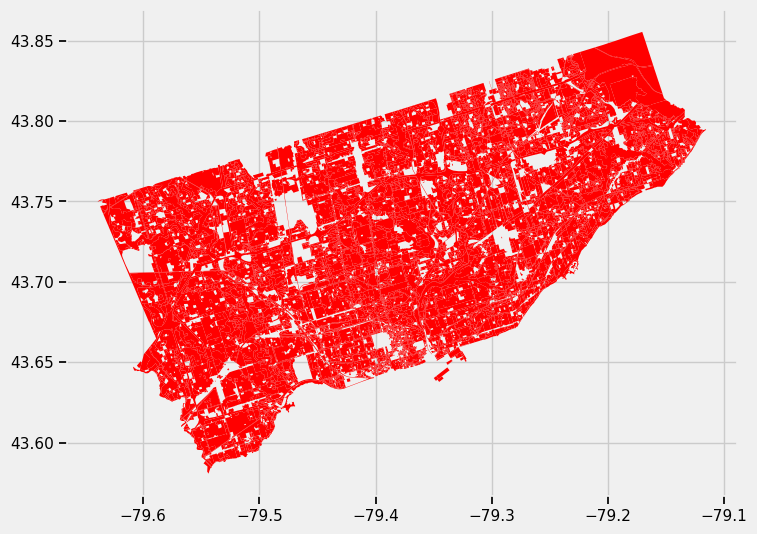

In [66]:
zoning_data['geometry'].plot(figsize=(12,6), color = 'red')

<Axes: >

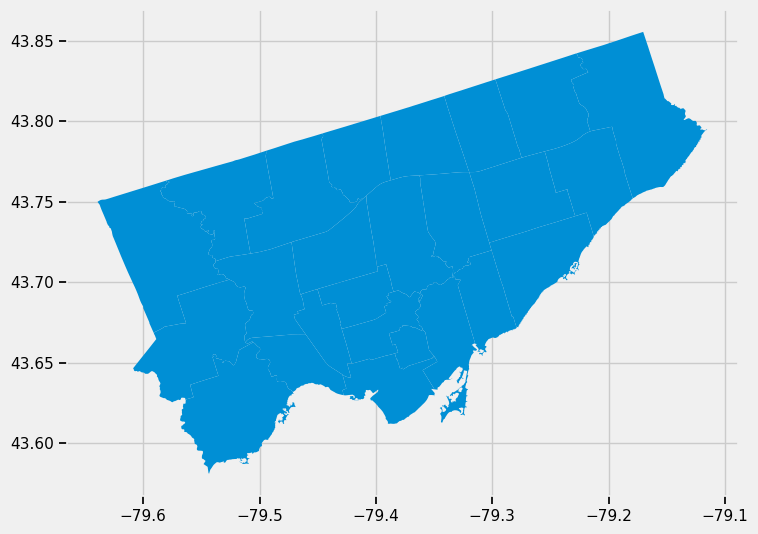

In [67]:
wards_data['geometry'].plot(figsize=(12,6))

It is clear they are both the same shape. First, we must ensure they are in the same coordinate Reference Systems (CRS) in Python / GeoPandas. First, lets see the CRS information for each file. 

In [69]:
print (zoning_data.crs)
print (wards_data.crs)

EPSG:4326
EPSG:4326


We will convert from EPSG:4326 (WGS 84, geographic coordinate system) to EPSG:32617 (UTM Zone 17N, projected coordinate system) because of the following reasons:

- EPSG:4326 uses latitude and longitude in decimal degrees but EPSG:32617 uses meters as units, which will be the ideal unit when we determine the zoning areas in each ward. It can accurately measure the areas of the polygons when we require it to. 
- EPSG:32617 is tailored for regions in UTM Zone 17N, which covers the City of Toronto.

In [71]:
# Convert CRS to EPSG:32617
zoning_data = zoning_data.to_crs("EPSG:32617")  
wards_data = wards_data.to_crs("EPSG:32617")

We will now set up the goemetry features to align. First .buffer(0) will fix invalid geometries, such as self-intersections or improper polygon constructions, ensuring the data is valid for spatial operations. Then, .explode() separates multi-part geometries (multi-polygons in zoning_data) into individual components, making it easier to handle and analyze each part independently.

In [73]:
# Fix invalid geometries
zoning_data["geometry"] = zoning_data["geometry"].buffer(0)
wards_data["geometry"] = wards_data["geometry"].buffer(0)

# Explode multi-part geometries into individual parts
zoning_data = zoning_data.explode(index_parts=False)

Lets see the datasets now.

In [75]:
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,geometry
0,1,Utility and Transportation,UT,"POLYGON ((643976.844 4853137.893, 643972.012 4..."
1,2,Open Space,ON,"POLYGON ((620626.556 4840726.078, 620625.736 4..."
2,3,Residential,RD,"POLYGON ((638817.665 4851182.615, 638815.972 4..."
3,4,Open Space,O,"POLYGON ((615151.959 4841962.396, 615146.975 4..."
4,5,Residential,RD,"POLYGON ((639780.906 4852455.19, 639785.029 48..."


In [76]:
wards_data.head()

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4..."
1,2551044,WD18,03,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((621142.679 4834316.93, 621184.054 48..."
2,2551048,WD18,15,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((632731.112 4841620.045, 632750.244 4..."
3,2551052,WD18,23,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((642619.92 4855587.637, 642648.265 48..."
4,2551056,WD18,11,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((629747.036 4838758.082, 629746.875 4..."


The geometries are aligned in shape, now we will use spatial relationships and operation to assign a ward number (AREA_L_CD) to each zoning geometry by checking which ward(s) it intersects or is contained within. If the zoning data intersects more than one ward, it will split the same zoning area to multiple rows (# rows = # wards it intersects) and returns the intersection area in that ward. 

In [78]:
# Add a new column to the zoning data with the corresponding ward number, ward name and intersected area
def calculate_intersection_areas(zoning, wards):
    
    # Initialize an empty list to store new rows with intersection areas
    rows = []
    
    # Iterate through each zone in the zoning GeoDataFrame
    for _, zone in zoning.iterrows():
        
        # Find all wards that intersect with the zoning geometry
        intersects = wards[wards.intersects(zone.geometry)]
        
        # If matches are found, calculate the intersection area for each
        for _, ward in intersects.iterrows():

            # Compute intersection geometry
            intersection = zone.geometry.intersection(ward.geometry)  

             # Calculate area
            intersection_area = intersection.area if not intersection.is_empty else 0 
            
            # Create a new row with the intersection area, ward number, and ward name
            new_row = zone.copy()  # Copy the original zone row
            new_row["WARD_NUMBER"] = ward["AREA_L_CD"]  # Assign the ward number
            new_row["WARD_NAME"] = ward["AREA_NAME"]  # Assign the ward name
            new_row["INTERSECTION_AREA"] = intersection_area  # Add the intersection area
            rows.append(new_row)
    
    # Convert the list of rows into a new GeoDataFrame
    return gpd.GeoDataFrame(rows, crs=zoning.crs)

# Apply the function
zones_in_wards = calculate_intersection_areas(zoning_data, wards_data)

Let's explore a part of the data. 

In [80]:
# Preview the result
zones_in_wards.tail(8)

,_id,GEN_ZONE,ZN_ZONE,geometry,WARD_NUMBER,WARD_NAME,INTERSECTION_AREA
11712,11713,Residential,R,"POLYGON ((630249.351 4839028.021, 630252.35 48...",11,University-Rosedale,29645.152015
11713,11714,Residential,R,"POLYGON ((630037.287 4838663.014, 630040.337 4...",11,University-Rosedale,12093.037761
11714,11715,Residential,R,"POLYGON ((629951.405 4838704.991, 629952.559 4...",11,University-Rosedale,7673.531120
11715,11716,Residential,R,"POLYGON ((630334.555 4839156.15, 630328.572 48...",15,Don Valley West,17.074920
11715,11716,Residential,R,"POLYGON ((630334.555 4839156.15, 630328.572 48...",11,University-Rosedale,9172.106631
11716,11717,Residential,R,"POLYGON ((630323.691 4838541.771, 630295.307 4...",11,University-Rosedale,11241.590735
11717,11718,Residential,R,"POLYGON ((630148.598 4838653.859, 630140.508 4...",11,University-Rosedale,7092.482843
11718,11719,Residential,R,"POLYGON ((630208.281 4838718.139, 630211.394 4...",11,University-Rosedale,2044.035688


In [81]:
zones_in_wards.shape

(12768, 7)

We can see the zoning area with the id 11716 intersects with two wards, 11 and 15, so it was split into 2 rows to show the intersection area with each of the wards. That also explains why the number of rows increased from to 12768.

It is important to note that the intersection area is in m^2, since we converted to a CRS of EPSG:32617.

In [83]:
zones_in_wards.isnull().sum()

_id                  0
GEN_ZONE             0
ZN_ZONE              0
geometry             0
WARD_NUMBER          0
WARD_NAME            0
INTERSECTION_AREA    0
dtype: int64

There are no null values to be investigated in the new combined dataset. What we are really interested in is in each ward, what percent of the area is residential, commericial, industrial etc. Now that we have combined the two datasets and the zonng_data included the columns GEN_ZONE and ZN_ZONE, we can use those features to determine the percents. Let us start with GEN_ZONE. 

In [85]:
# Create a new DataFrame to calculate the percentage of each GEN_ZONE occupying each ward
def gen_zone_percent_by_ward(gdf):
    
    # Group by WARD_NUMBER and GEN_ZONE to sum the intersection areas
    grouped = gdf.groupby(["WARD_NUMBER", "GEN_ZONE"])["INTERSECTION_AREA"].sum().reset_index()

    # Calculate the total area for each ward
    total_area_by_ward = grouped.groupby("WARD_NUMBER")["INTERSECTION_AREA"].sum().reset_index()
    total_area_by_ward.rename(columns={"INTERSECTION_AREA": "TOTAL_AREA"}, inplace=True)

    # Merge the total area into the grouped data
    merged = grouped.merge(total_area_by_ward, on="WARD_NUMBER")

    # Calculate the percentage of each GEN_ZONE in each ward
    merged["PERCENTAGE"] = (merged["INTERSECTION_AREA"] / merged["TOTAL_AREA"]) * 100

    # Set WARD_NUMBER as the rows and GEN_ZONE as the columns
    percentage_df = merged.pivot(index="WARD_NUMBER", columns="GEN_ZONE", values="PERCENTAGE").fillna(0)

    return percentage_df

# Apply the function to calculate percentages
gen_zone_percent = gen_zone_percent_by_ward(zones_in_wards)

# Display the result
gen_zone_percent.head()

GEN_ZONE,Commercial,Commercial Residential,Commercial Residential Employment,Employment Industrial,Institutional,Open Space,Residential,Residential Apartment,Utility and Transportation
WARD_NUMBER,,,,,,,,,
01,0.181988,0.890797,0.000000,32.809599,0.973783,18.977204,31.521848,3.385092,11.259688
02,0.256798,1.727357,0.000000,0.620947,0.213832,20.512482,66.968958,4.579583,5.120043
03,0.034497,3.081609,0.096093,26.866652,0.792144,11.562936,46.426682,2.640596,8.498791
04,0.000000,6.443567,0.000000,0.367900,0.427156,13.539035,74.533703,0.339431,4.349208
05,0.042658,3.190665,0.000000,7.747211,0.009262,21.038863,56.660167,5.307574,6.003599


We can see now that each ward number is in the rows and the columns represent the percentage of each zonign area type. 

Now let's plot the distribution for all of the zoning area types in each ward. 

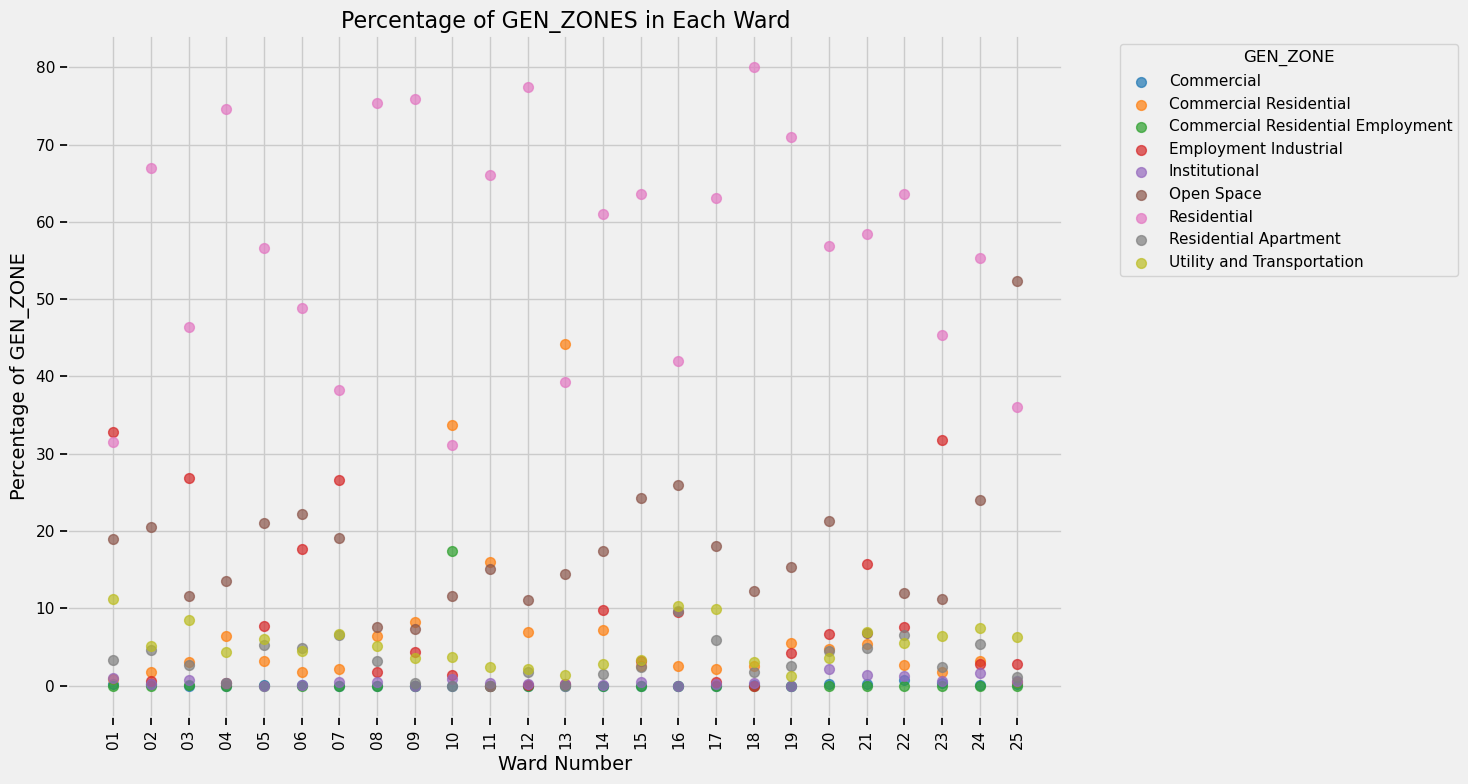

In [282]:
# Define a custom color palette using seaborn or manually
unique_gen_zones = gen_zone_percent.columns
palette = sns.color_palette('tab10', len(unique_gen_zones))  

# Create a mapping of GEN_ZONE to a specific color
gen_zone_colors = dict(zip(unique_gen_zones, palette))

# Plot the scatter plot for percentages
plt.figure(figsize=(15, 8))
for gen_zone in unique_gen_zones:
    plt.scatter(
        gen_zone_percent.index, 
        gen_zone_percent[gen_zone], 
        label=gen_zone, 
        color=gen_zone_colors[gen_zone],  # Use the custom color for this GEN_ZONE
        s=50, 
        alpha=0.7
    )

# Customize the plot
plt.title('Percentage of GEN_ZONES in Each Ward', fontsize=16)
plt.xlabel('Ward Number', fontsize=14)
plt.ylabel('Percentage of GEN_ZONE', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.legend(title='GEN_ZONE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [88]:
### EDA

Now we will do the same for ZN_ZONE feature.

In [90]:
# Create a new DataFrame to calculate the percentage of each ZN_ZONE occupying each ward
def zn_zone_percent_by_ward(gdf):
    
    # Group by WARD_NUMBER and ZN_ZONE to sum the intersection areas
    grouped = gdf.groupby(["WARD_NUMBER", "ZN_ZONE"])["INTERSECTION_AREA"].sum().reset_index()

    # Calculate the total area for each ward
    total_area_by_ward = grouped.groupby("WARD_NUMBER")["INTERSECTION_AREA"].sum().reset_index()
    total_area_by_ward.rename(columns={"INTERSECTION_AREA": "TOTAL_AREA"}, inplace=True)

    # Merge the total area into the grouped data
    merged = grouped.merge(total_area_by_ward, on="WARD_NUMBER")

    # Calculate the percentage of each ZN_ZONE in each ward
    merged["PERCENTAGE"] = (merged["INTERSECTION_AREA"] / merged["TOTAL_AREA"]) * 100

    # Set WARD_NUMBER as the rows and ZN_ZONE as the columns
    percentage_df = merged.pivot(index="WARD_NUMBER", columns="ZN_ZONE", values="PERCENTAGE").fillna(0)

    return percentage_df

# Apply the function to calculate percentages for ZN_ZONE
zn_zone_percent = zn_zone_percent_by_ward(zones_in_wards)

# Display the result
zn_zone_percent.head()

ZN_ZONE,CL,CR,CRE,E,EH,EL,EO,I,IE,IH,...,ON,OR,R,RA,RAC,RD,RM,RS,RT,UT
WARD_NUMBER,,,,,,,,,,,,,,,,,,,,,
01,0.181988,0.890797,0.000000,28.981767,2.019925,0.000000,1.807907,0.667222,0.000000,0.271745,...,12.108479,2.592783,0.000000,1.044738,2.340354,24.246856,2.595644,1.524388,3.154961,11.259688
02,0.256798,1.727357,0.000000,0.620947,0.000000,0.000000,0.000000,0.213832,0.000000,0.000000,...,6.675967,7.859864,0.000000,3.068699,1.510885,62.881241,1.170345,1.333886,1.583487,5.120043
03,0.034497,3.081609,0.096093,26.784161,0.000000,0.082491,0.000000,0.069497,0.406369,0.302689,...,5.031363,4.815891,0.000000,2.640596,0.000000,31.113653,13.934209,0.131577,1.247243,8.498791
04,0.000000,6.443567,0.000000,0.000000,0.000000,0.291934,0.075966,0.300543,0.000000,0.126613,...,7.552587,5.452161,52.226152,0.177425,0.162006,14.751909,5.495957,2.028819,0.030867,4.349208
05,0.042658,3.190665,0.000000,5.137879,1.554449,1.054883,0.000000,0.009262,0.000000,0.000000,...,8.404424,6.939935,1.390200,3.646423,1.661152,32.326108,18.946746,2.448302,1.548811,6.003599


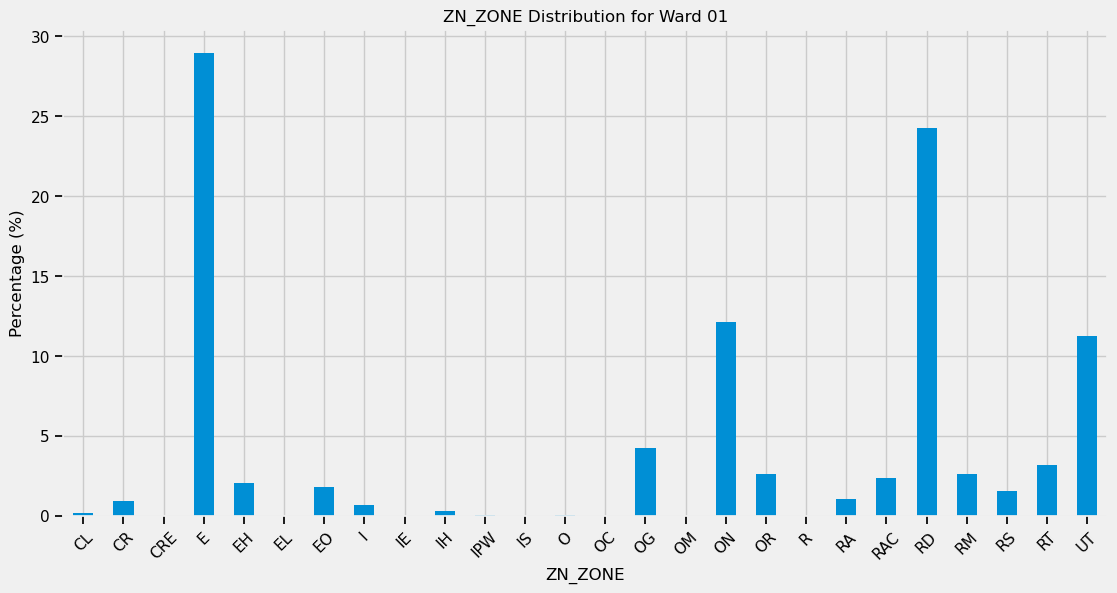

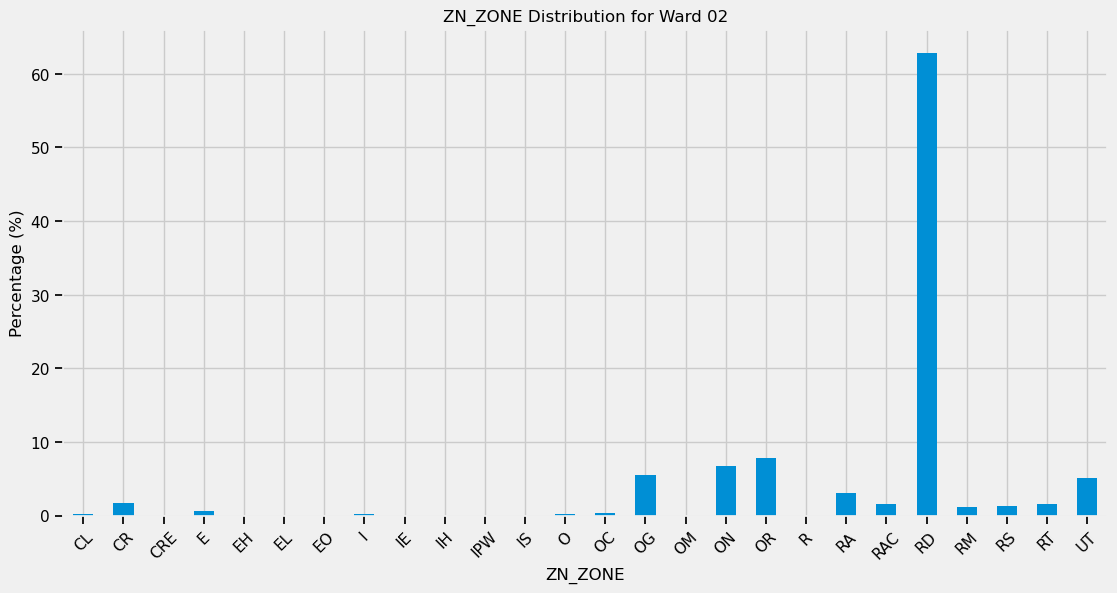

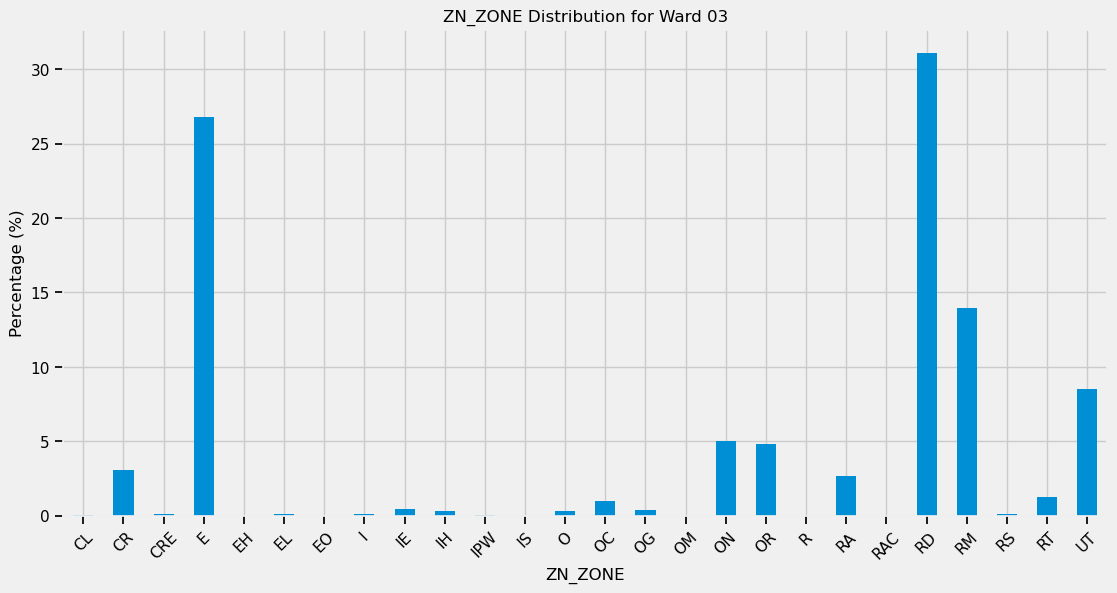

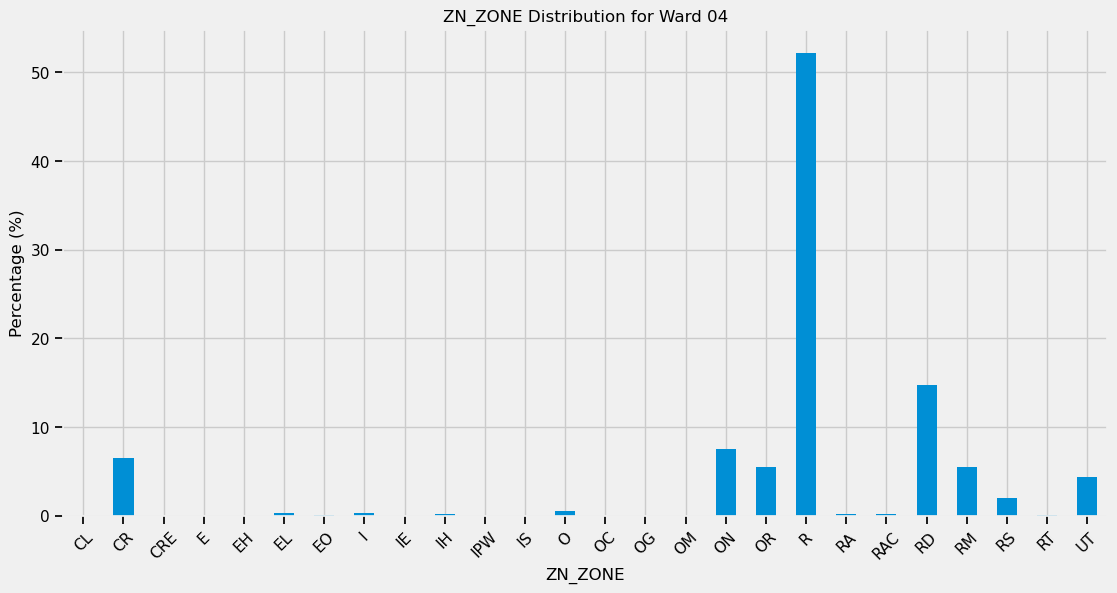

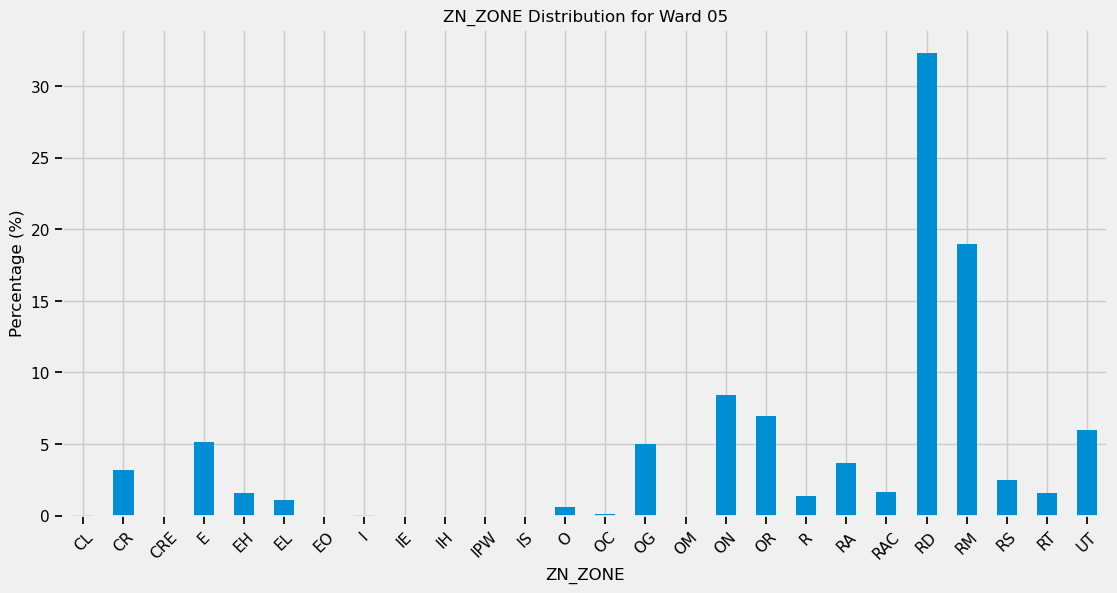

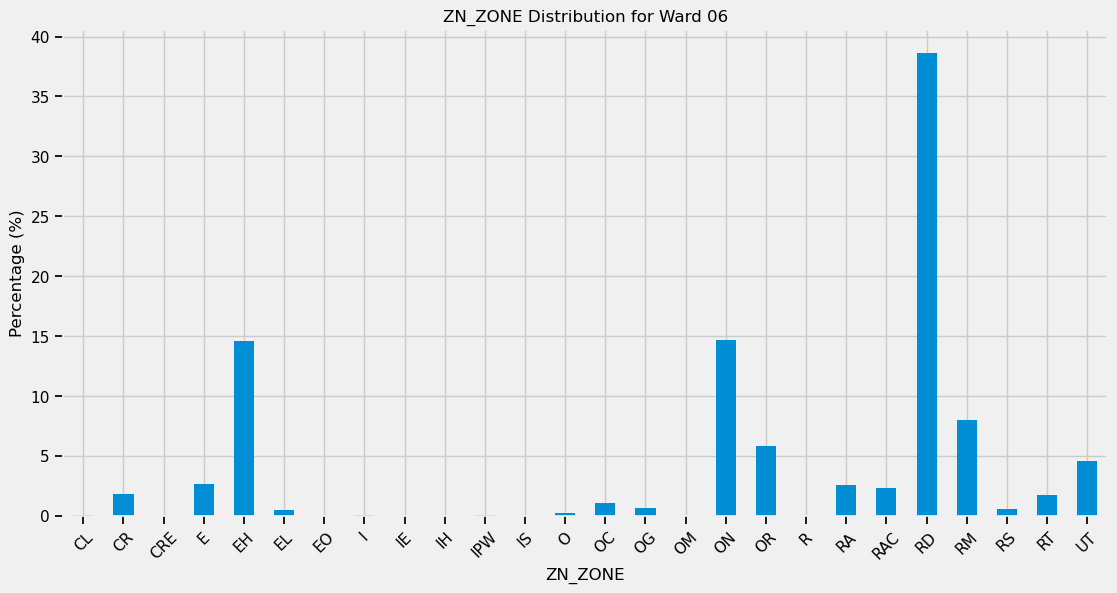

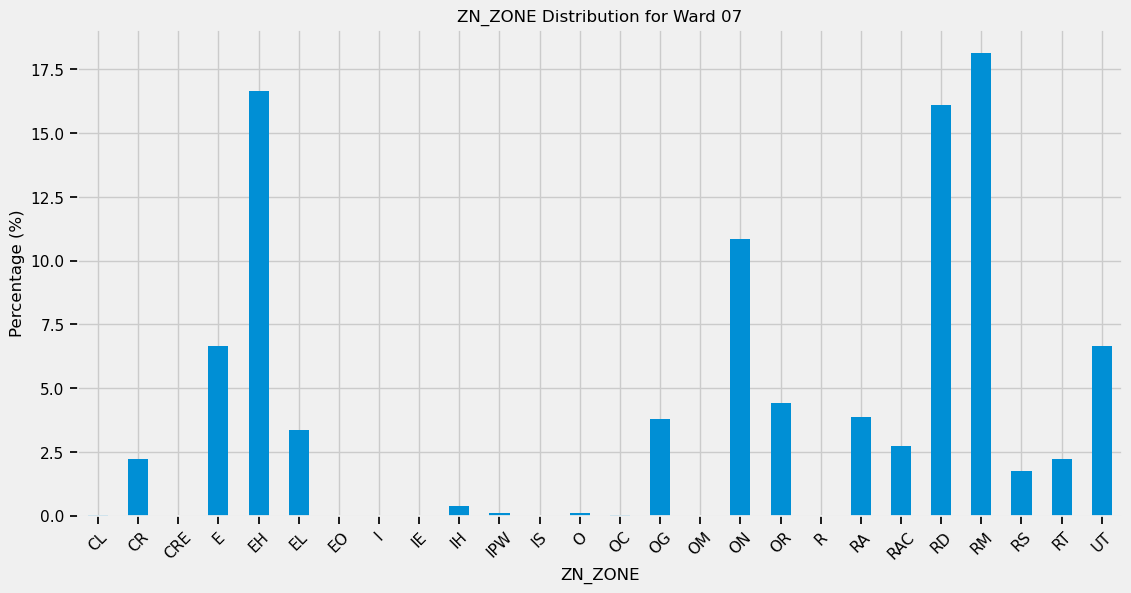

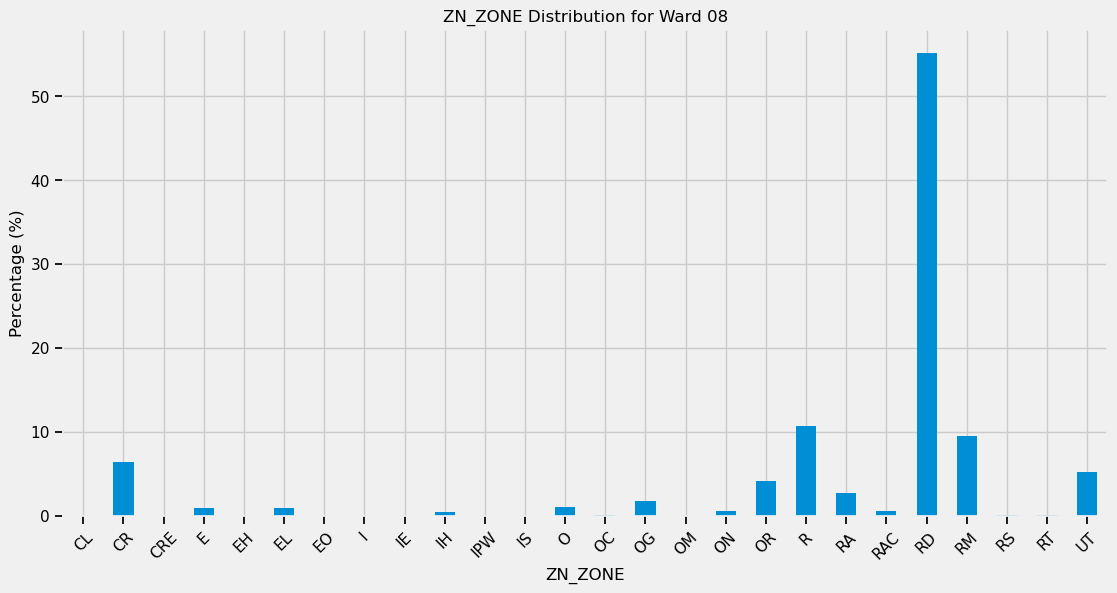

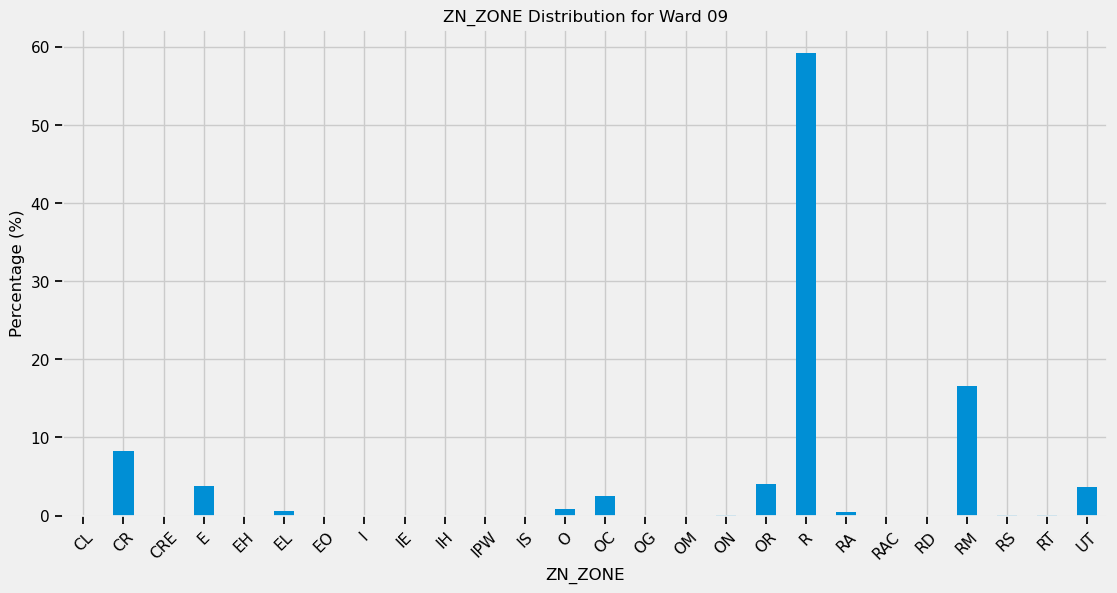

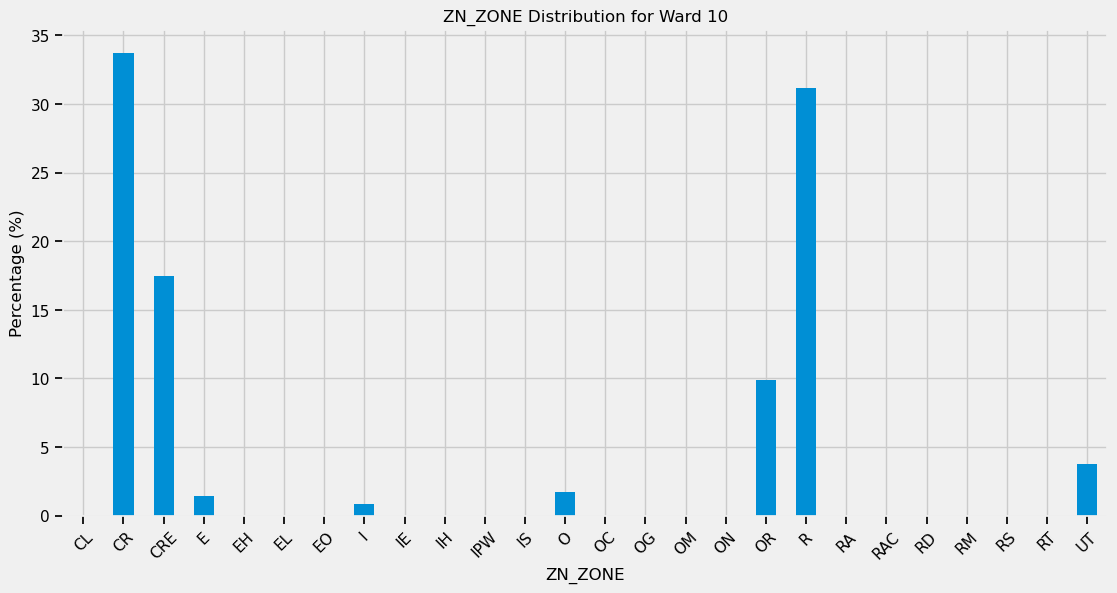

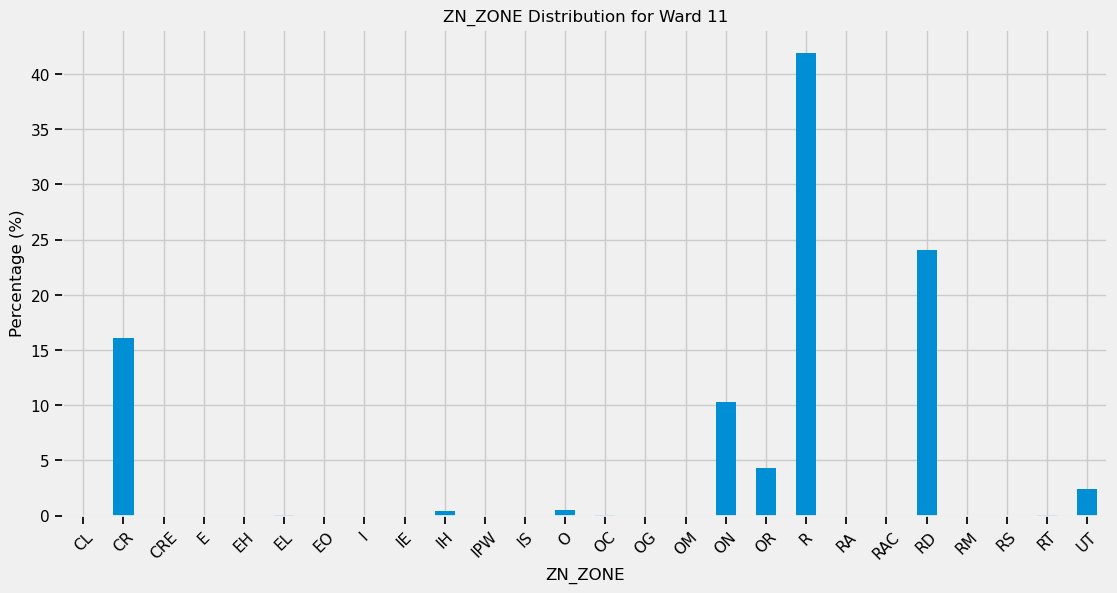

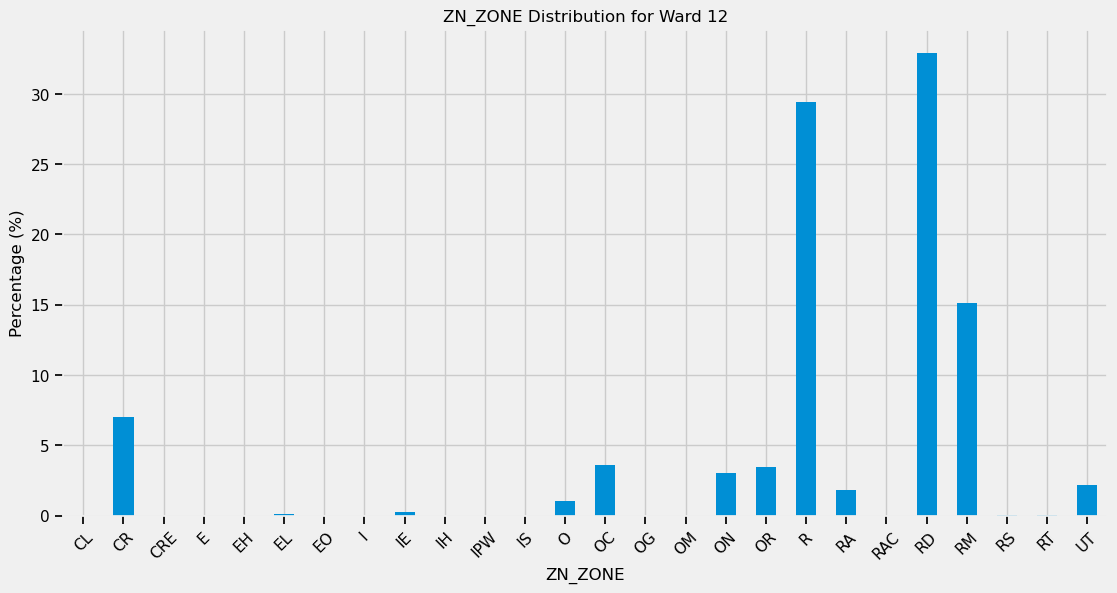

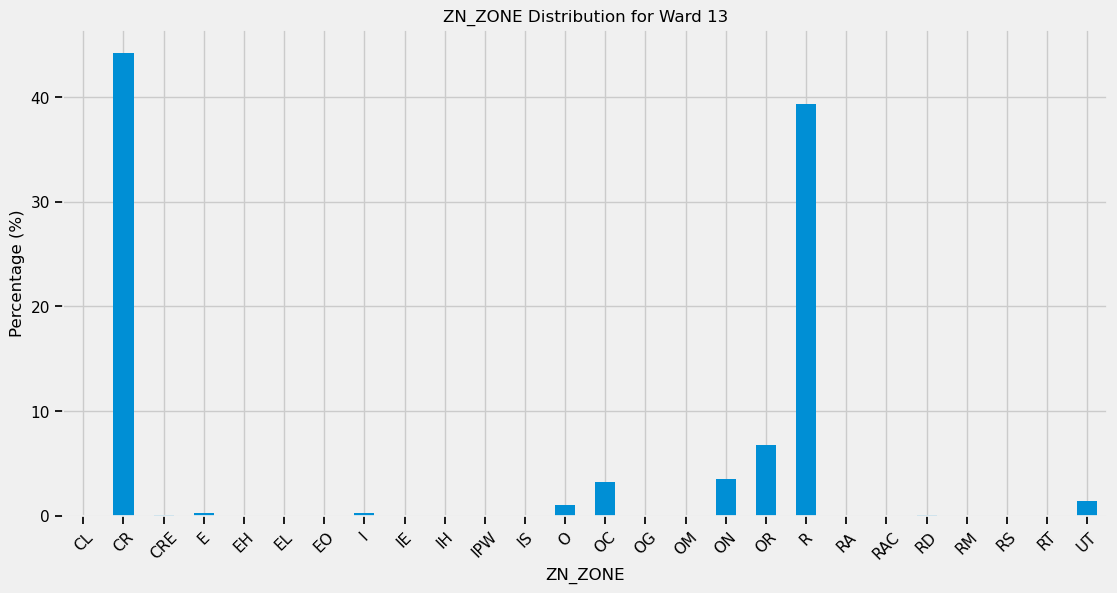

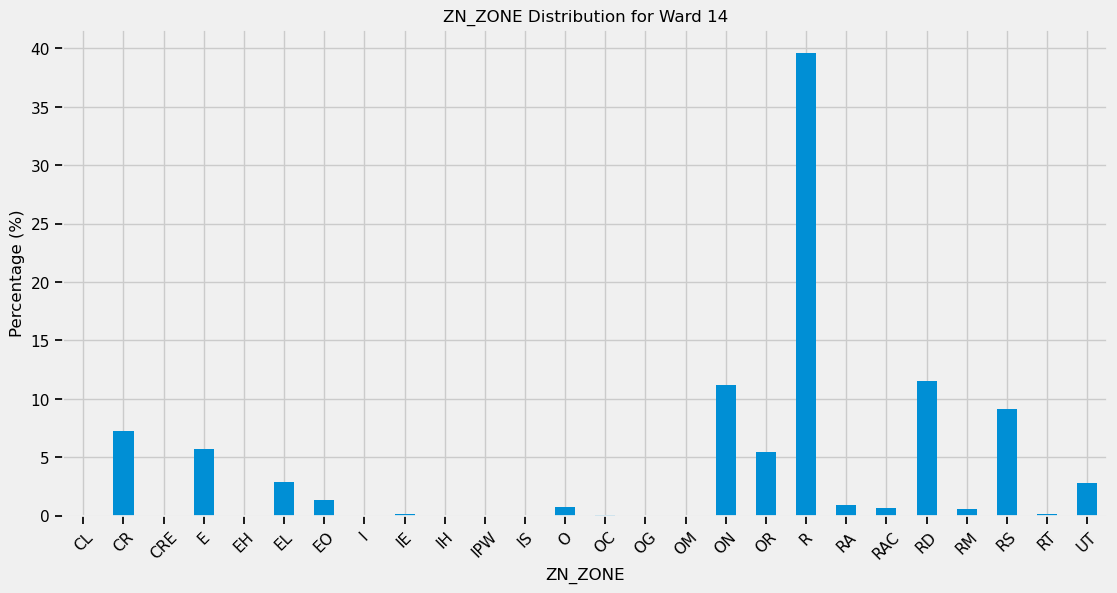

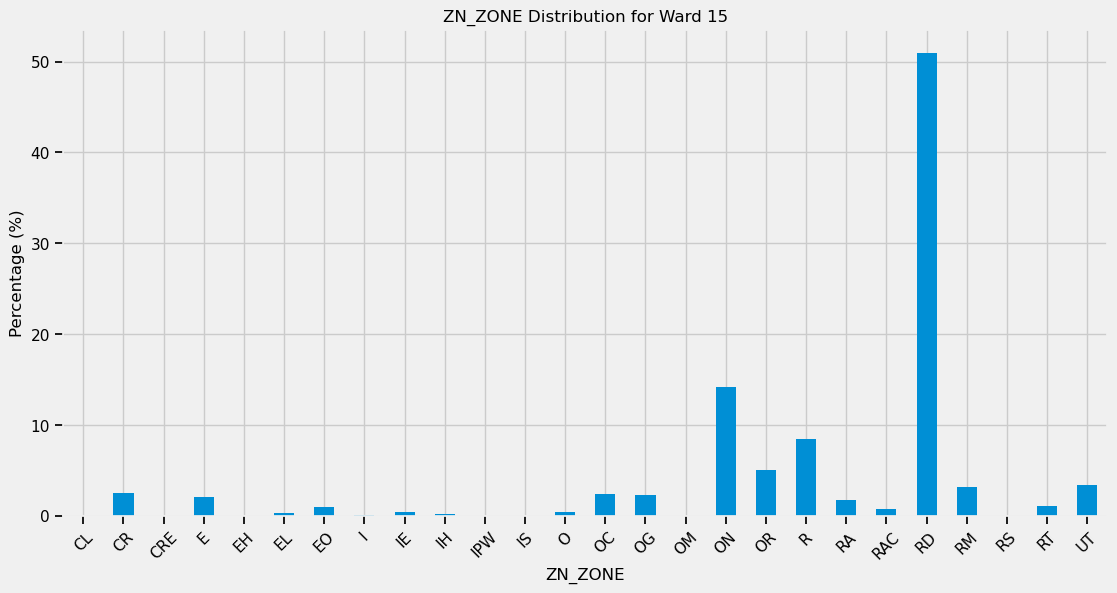

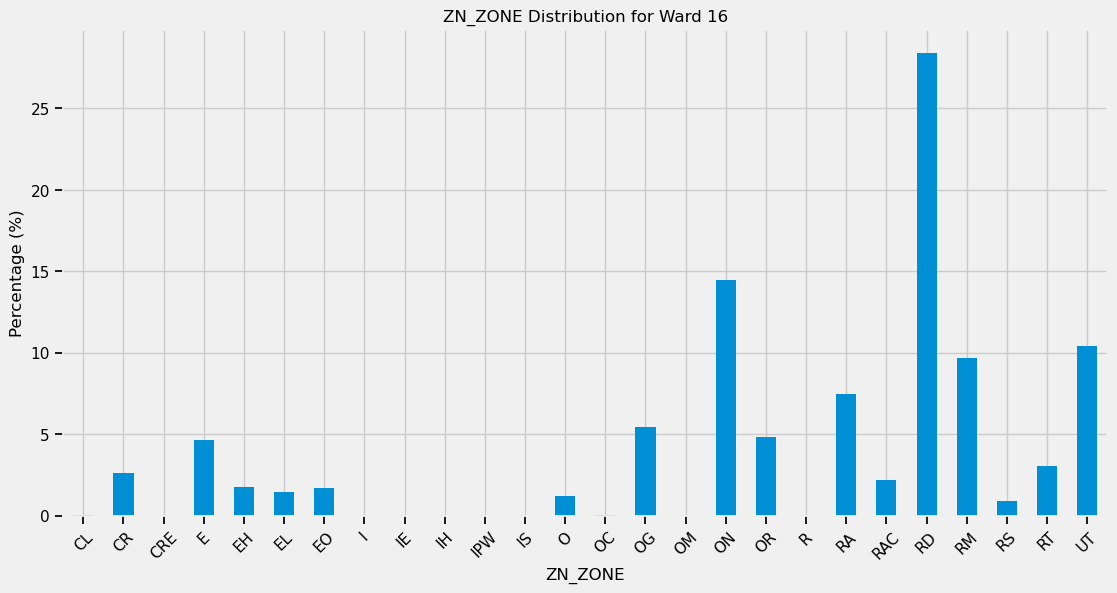

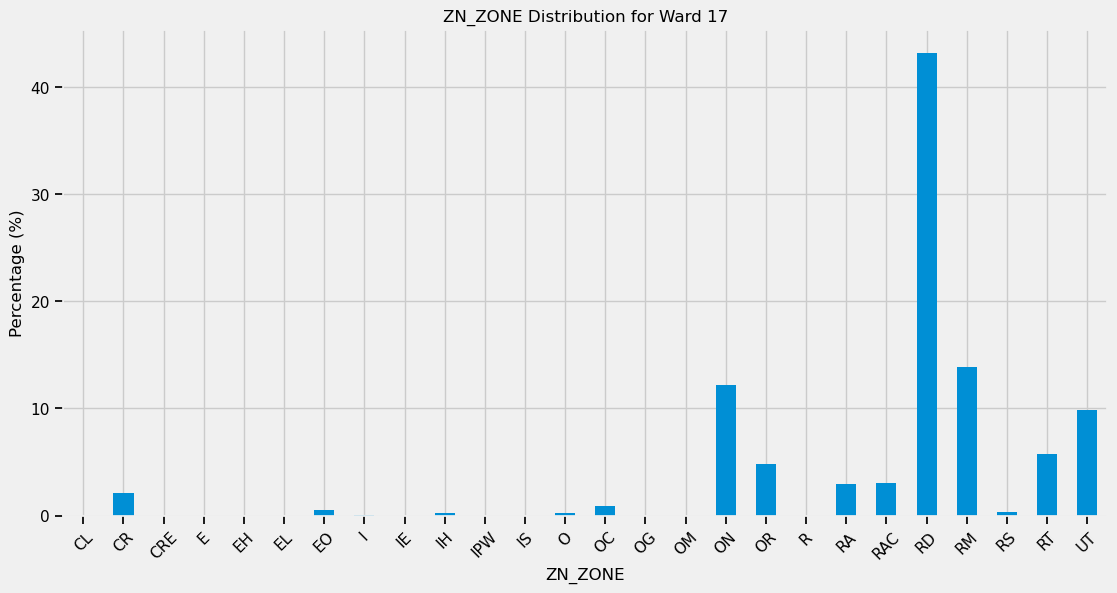

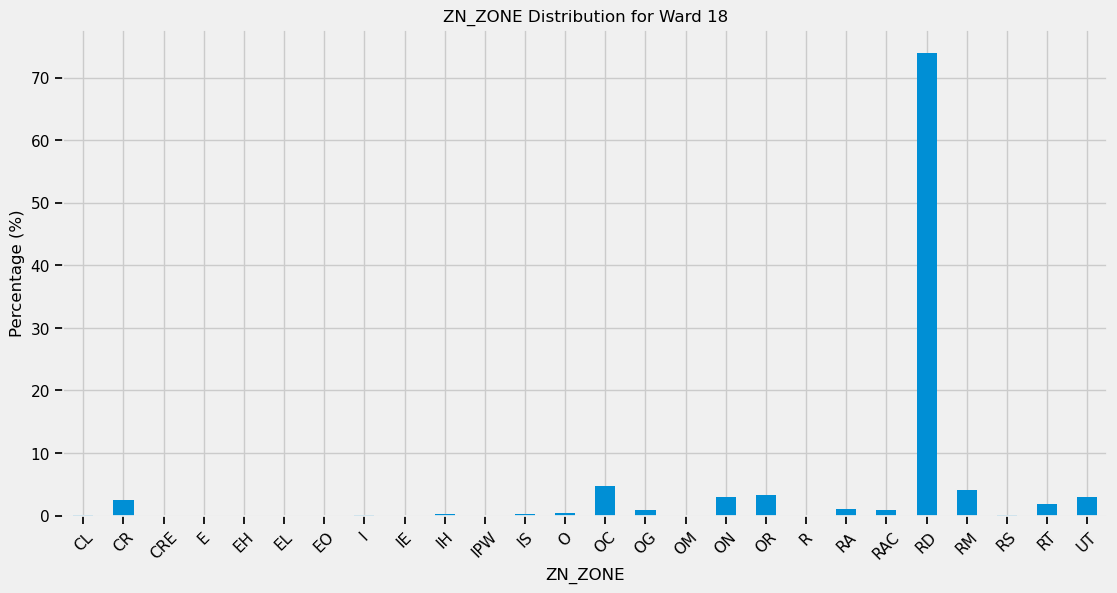

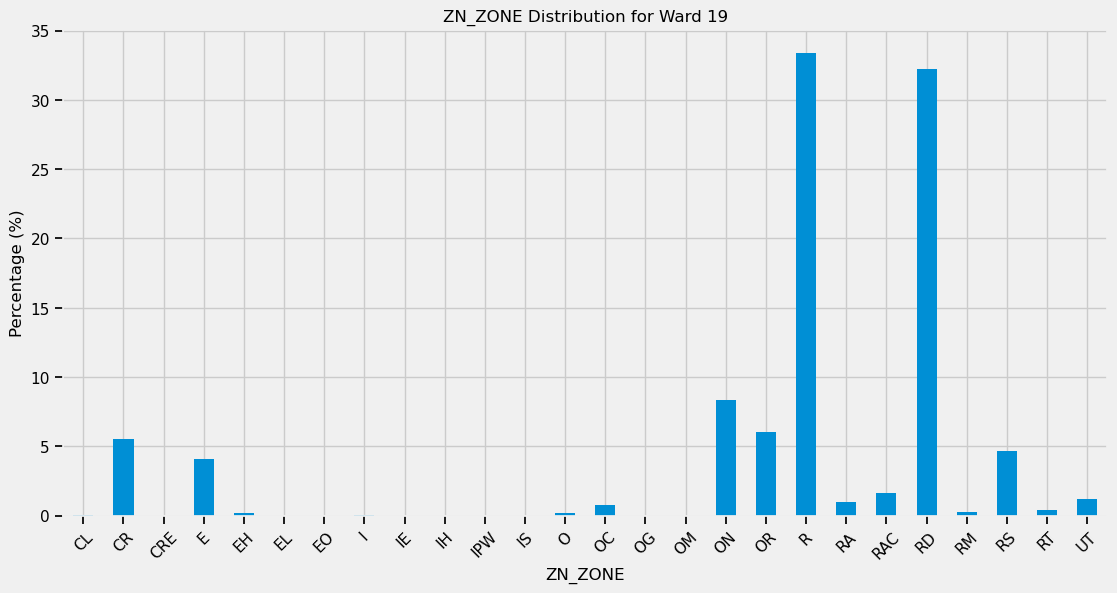

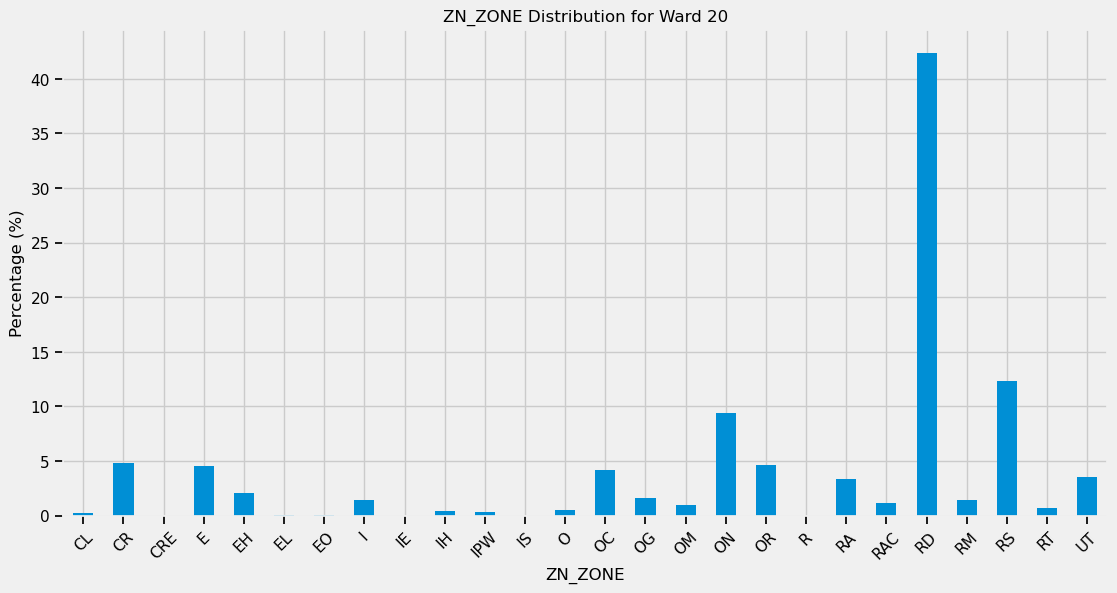

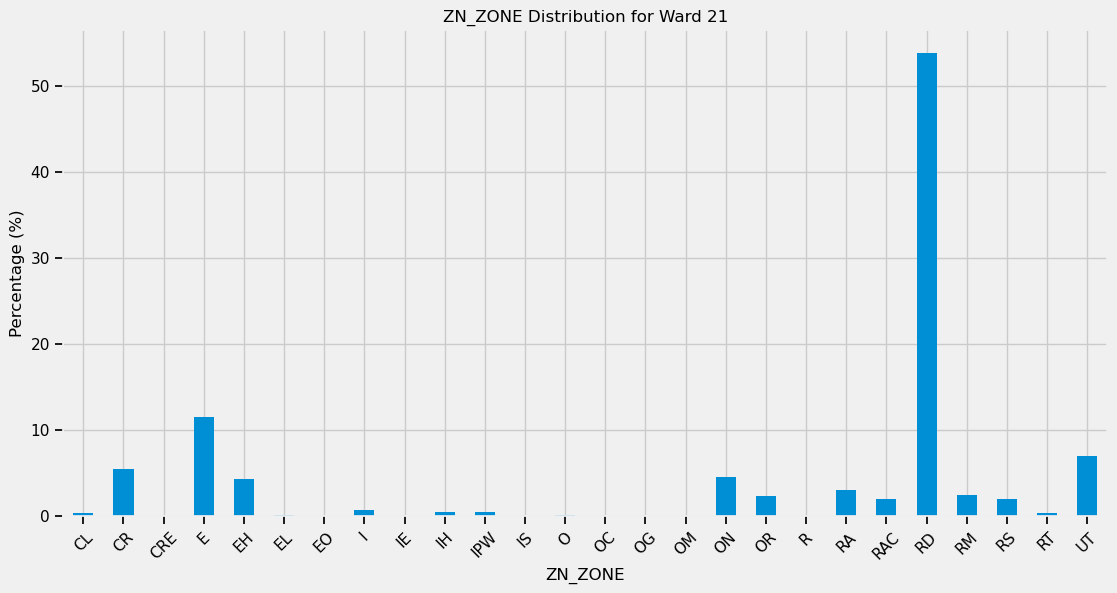

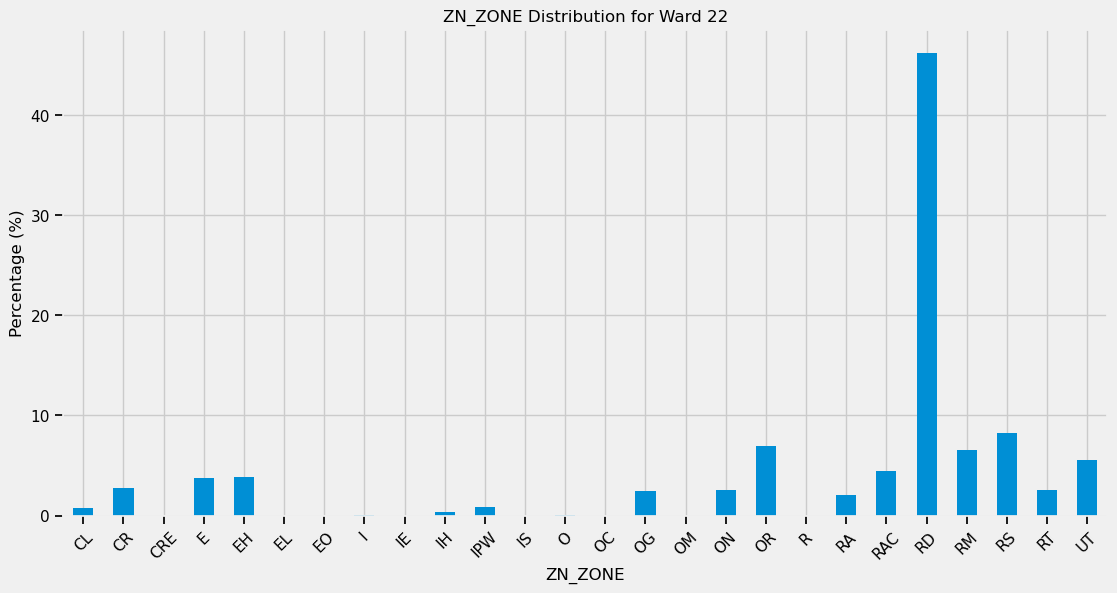

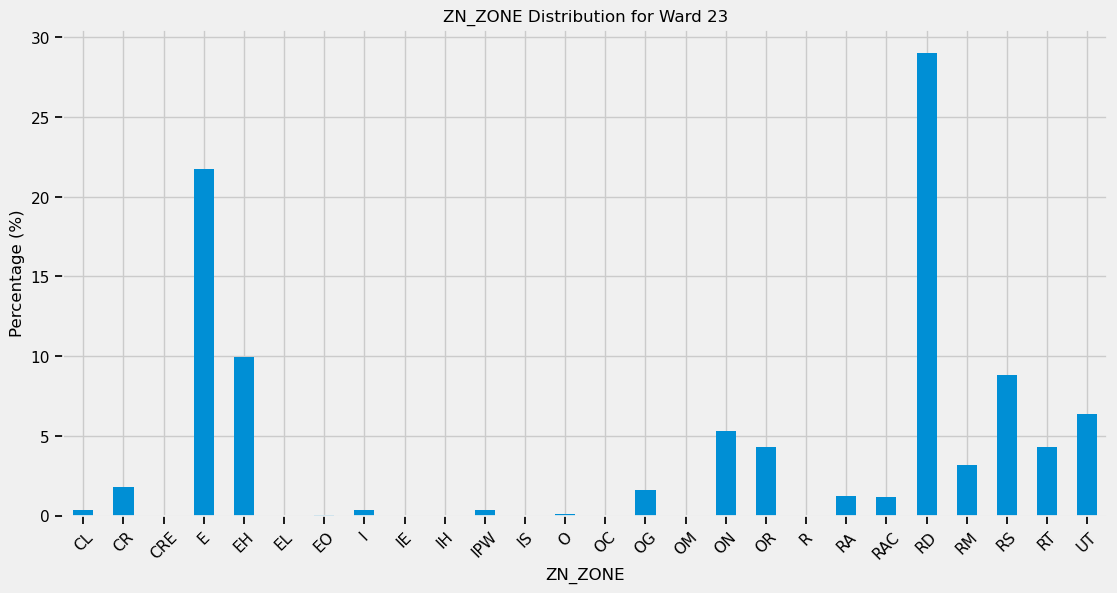

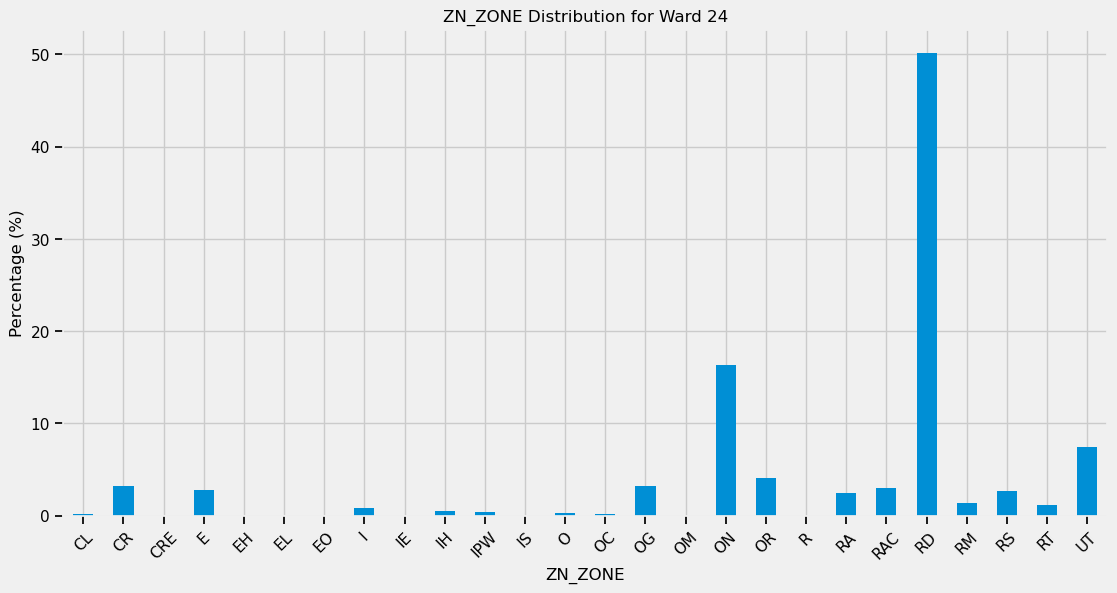

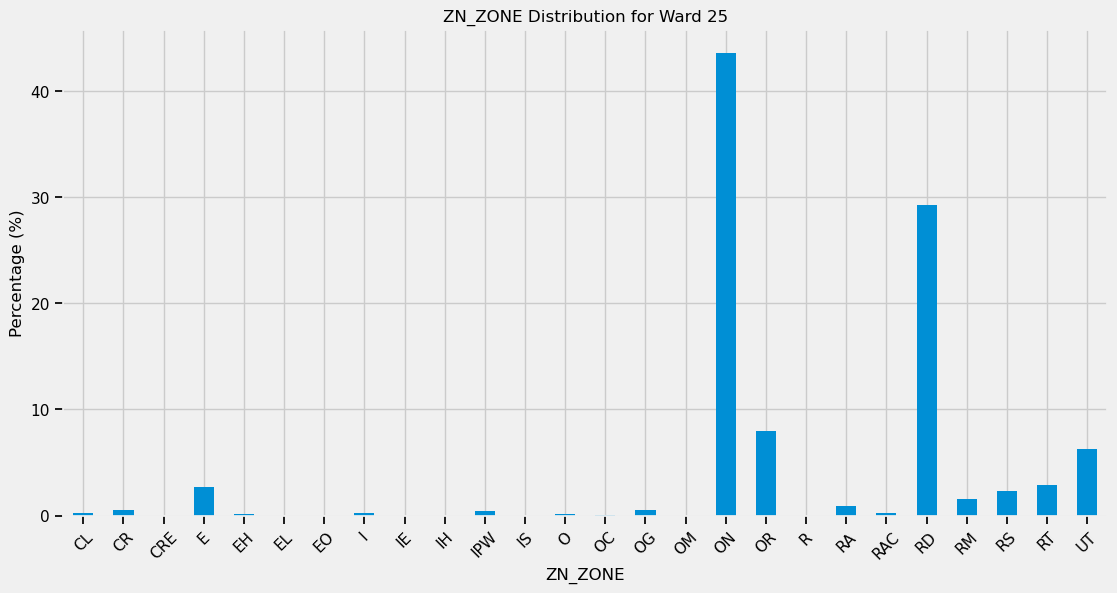

In [91]:
# Plot distribution for each ward
for ward in zn_zone_percent.index:
    ward_data = zn_zone_percent.loc[ward]
    plt.figure(figsize=(12, 6))
    ward_data.plot(kind="bar")
    plt.title(f"ZN_ZONE Distribution for Ward {ward}")
    plt.xlabel("ZN_ZONE")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.show()

In [92]:
## EDA

Now lets combine this into one large geoDataFrame. Since they have the same rows (WARD_NUMBER), can use pd.concat to easily combine them. 

In [94]:
# Use pd.concat() to combine gen_zone_percent and zn_zone_percent along columns
zoning_areas_in_wards = pd.concat([gen_zone_percent, zn_zone_percent], axis=1)

# Display the combined DataFrame
zoning_areas_in_wards.head()

,Commercial,Commercial Residential,Commercial Residential Employment,Employment Industrial,Institutional,Open Space,Residential,Residential Apartment,Utility and Transportation,CL,...,ON,OR,R,RA,RAC,RD,RM,RS,RT,UT
WARD_NUMBER,,,,,,,,,,,,,,,,,,,,,
01,0.181988,0.890797,0.000000,32.809599,0.973783,18.977204,31.521848,3.385092,11.259688,0.181988,...,12.108479,2.592783,0.000000,1.044738,2.340354,24.246856,2.595644,1.524388,3.154961,11.259688
02,0.256798,1.727357,0.000000,0.620947,0.213832,20.512482,66.968958,4.579583,5.120043,0.256798,...,6.675967,7.859864,0.000000,3.068699,1.510885,62.881241,1.170345,1.333886,1.583487,5.120043
03,0.034497,3.081609,0.096093,26.866652,0.792144,11.562936,46.426682,2.640596,8.498791,0.034497,...,5.031363,4.815891,0.000000,2.640596,0.000000,31.113653,13.934209,0.131577,1.247243,8.498791
04,0.000000,6.443567,0.000000,0.367900,0.427156,13.539035,74.533703,0.339431,4.349208,0.000000,...,7.552587,5.452161,52.226152,0.177425,0.162006,14.751909,5.495957,2.028819,0.030867,4.349208
05,0.042658,3.190665,0.000000,7.747211,0.009262,21.038863,56.660167,5.307574,6.003599,0.042658,...,8.404424,6.939935,1.390200,3.646423,1.661152,32.326108,18.946746,2.448302,1.548811,6.003599


## Combine With Collision Data per Wards

In [96]:
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,geometry
0,1,Utility and Transportation,UT,"POLYGON ((643976.844 4853137.893, 643972.012 4..."
1,2,Open Space,ON,"POLYGON ((620626.556 4840726.078, 620625.736 4..."
2,3,Residential,RD,"POLYGON ((638817.665 4851182.615, 638815.972 4..."
3,4,Open Space,O,"POLYGON ((615151.959 4841962.396, 615146.975 4..."
4,5,Residential,RD,"POLYGON ((639780.906 4852455.19, 639785.029 48..."


In [303]:
# Save the zoning_data GeoDataFrame to a GeoJSON file
zoning_data.to_file("zoning_data.geojson", driver="GeoJSON")

In [307]:
collision_zone_data = gpd.read_file('../../data_files/collision_data_with_wards.geojson')

In [309]:
collision_zone_data.head()

,DATE,HOUR,LONGITUDE,LATITUDE,Year,Month,Day Of Week,TIME_OF_DAY,index_right,AREA_L_CD,AREA_NAME,geometry
0,2019-01-01,1,-79.412663,43.781332,2019,1,Tuesday,Night (9 PM - 5 AM),20.0,18,Willowdale,POINT (-79.41266 43.78133)
1,2019-01-01,15,-79.298106,43.781057,2019,1,Tuesday,Afternoon (12 PM - 5 PM),14.0,22,Scarborough-Agincourt,POINT (-79.29811 43.78106)
2,2019-01-01,4,-79.411207,43.665137,2019,1,Tuesday,Night (9 PM - 5 AM),4.0,11,University-Rosedale,POINT (-79.41121 43.66514)
3,2019-01-01,15,-79.619023,43.723466,2019,1,Tuesday,Afternoon (12 PM - 5 PM),11.0,01,Etobicoke North,POINT (-79.61902 43.72347)
4,2019-01-01,8,-79.287580,43.727781,2019,1,Tuesday,Morning (5 AM - 12 PM),18.0,20,Scarborough Southwest,POINT (-79.28758 43.72778)


In [311]:
print("Number of empty geometries in collision data:", collision_zone_data['geometry'].is_empty.sum())

# Check for invalid geometries
print("Number of invalid geometries in collision data:", (~collision_zone_data.is_valid).sum())

Number of empty geometries in collision data: 0
Number of invalid geometries in collision data: 0


In [99]:
# from shapely.geometry import Point
# collision_zone_data['geometry'] = collision_zone_data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
# collision_zone_data = gpd.GeoDataFrame(collision_zone_data, geometry='geometry', crs="EPSG:4326")

In [100]:
print("Number of empty geometries in collision data:", collision_zone_data['geometry'].is_empty.sum())

# Check for invalid geometries
print("Number of invalid geometries in collision data:", (~collision_zone_data.is_valid).sum())

Number of empty geometries in collision data: 0
Number of invalid geometries in collision data: 0


In [101]:
# Inspect coordinate ranges
collision_zone_data.describe()

,DATE,HOUR,LONGITUDE,LATITUDE,Year,Month,index_right
count,298010,298010.000000,298010.000000,298010.000000,298010.000000,298010.000000,242137.000000
mean,2021-06-15 06:59:52.872000,13.289195,-64.714640,35.631033,2020.945723,6.634100,11.635050
min,2019-01-01 00:00:00,0.000000,-79.639247,0.000000,2019.000000,1.000000,0.000000
25%,2019-11-24 00:00:00,10.000000,-79.444090,43.641000,2019.000000,3.000000,5.000000
50%,2021-08-06 00:00:00,14.000000,-79.364259,43.687913,2021.000000,7.000000,11.000000
75%,2022-11-23 00:00:00,17.000000,-79.247261,43.748055,2022.000000,10.000000,18.000000
max,2023-12-31 00:00:00,23.000000,0.000000,43.853164,2023.000000,12.000000,24.000000
std,NaN,5.111256,30.819762,16.968953,1.537495,3.498507,7.283435


In [151]:
print("Collision Data CRS:", collision_zone_data.crs)
print("Zoning Data CRS:", zoning_data.crs)

Collision Data CRS: EPSG:4326
Zoning Data CRS: EPSG:32617


In [153]:
zoning_data = zoning_data.to_crs("EPSG:4326")

In [155]:
print("Collision Data CRS:", collision_zone_data.crs)
print("Zoning Data CRS:", zoning_data.crs)

Collision Data CRS: EPSG:4326
Zoning Data CRS: EPSG:4326


<Axes: >

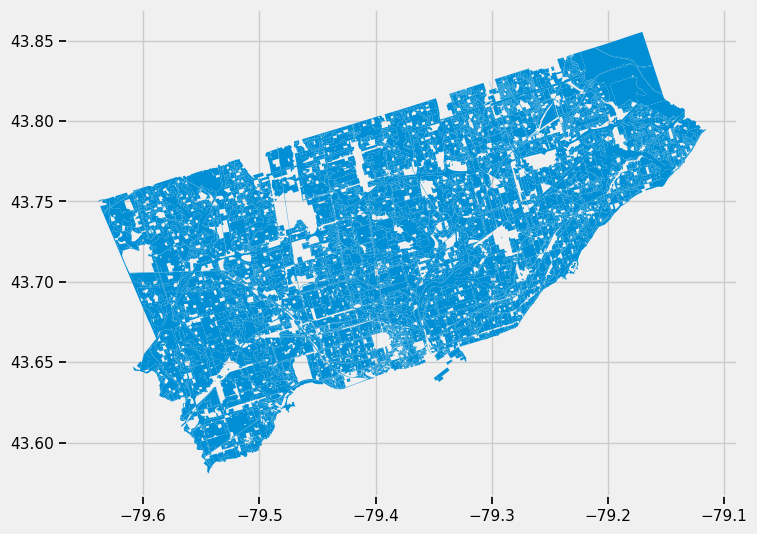

In [159]:
zoning_data['geometry'].plot(figsize=(12,6))

In [161]:
# Drop rows with 0 latitude or longitude
collision_zone_data = collision_zone_data[
    (collision_zone_data['LATITUDE'] != 0) & (collision_zone_data['LONGITUDE'] != 0)
]

# Confirm the rows are dropped
print("Shape after dropping 0 lat/long rows:", collision_zone_data.shape)

Shape after dropping 0 lat/long rows: (242916, 12)


<Axes: >

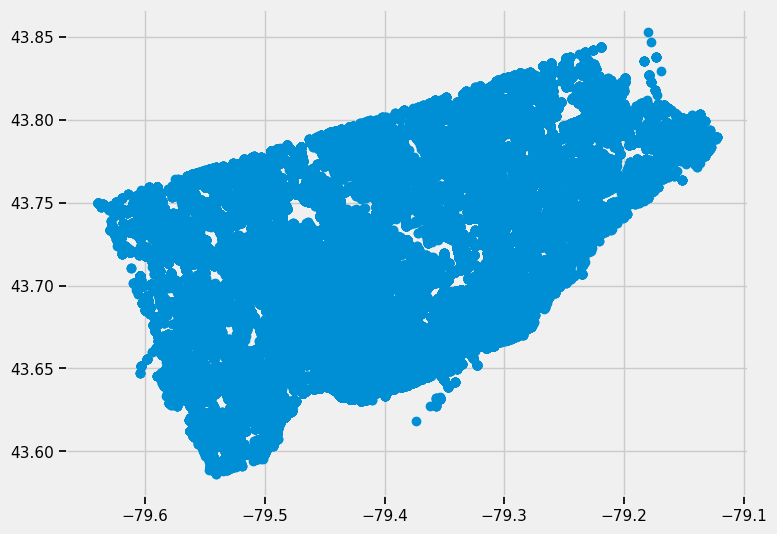

In [163]:
collision_zone_data['geometry'].plot(figsize=(12,6))

In [167]:
collision_zone_data.head()

,DATE,HOUR,LONGITUDE,LATITUDE,Year,Month,Day Of Week,TIME_OF_DAY,index_right,AREA_L_CD,AREA_NAME,geometry
0,2019-01-01,1,-79.412663,43.781332,2019,1,Tuesday,Night (9 PM - 5 AM),20.0,18,Willowdale,POINT (-79.41266 43.78133)
1,2019-01-01,15,-79.298106,43.781057,2019,1,Tuesday,Afternoon (12 PM - 5 PM),14.0,22,Scarborough-Agincourt,POINT (-79.29811 43.78106)
2,2019-01-01,4,-79.411207,43.665137,2019,1,Tuesday,Night (9 PM - 5 AM),4.0,11,University-Rosedale,POINT (-79.41121 43.66514)
3,2019-01-01,15,-79.619023,43.723466,2019,1,Tuesday,Afternoon (12 PM - 5 PM),11.0,01,Etobicoke North,POINT (-79.61902 43.72347)
4,2019-01-01,8,-79.287580,43.727781,2019,1,Tuesday,Morning (5 AM - 12 PM),18.0,20,Scarborough Southwest,POINT (-79.28758 43.72778)


In [169]:
collision_zone_data.drop(columns=['index_right'], inplace=True)

In [171]:
collision_zone_data.shape

(242916, 11)

Tried nearest it and it works but it is inaccurate because zones very close to one another have different data types. Therefore those columns will be dropped. 

In [220]:
combined_data = gpd.sjoin(collision_zone_data, zoning_data[['GEN_ZONE', 'geometry']], how='left', predicate='intersects')

In [222]:
# combined_data_nearest = gpd.sjoin_nearest(
#     collision_zone_data,
#     zoning_data[['GEN_ZONE', 'geometry']],  # Only necessary columns
#     how='left',  # Keep all collision data rows
#     distance_col='distance_to_zone'  # Add a column to show distance to nearest zone
# )

In [224]:
combined_data.head()

,DATE,HOUR,LONGITUDE,LATITUDE,Year,Month,Day Of Week,TIME_OF_DAY,AREA_L_CD,AREA_NAME,geometry,index_right,GEN_ZONE
0,2019-01-01,1,-79.412663,43.781332,2019,1,Tuesday,Night (9 PM - 5 AM),18,Willowdale,POINT (-79.41266 43.78133),NaN,NaN
1,2019-01-01,15,-79.298106,43.781057,2019,1,Tuesday,Afternoon (12 PM - 5 PM),22,Scarborough-Agincourt,POINT (-79.29811 43.78106),8032.0,Residential Apartment
2,2019-01-01,4,-79.411207,43.665137,2019,1,Tuesday,Night (9 PM - 5 AM),11,University-Rosedale,POINT (-79.41121 43.66514),10804.0,Commercial Residential
3,2019-01-01,15,-79.619023,43.723466,2019,1,Tuesday,Afternoon (12 PM - 5 PM),01,Etobicoke North,POINT (-79.61902 43.72347),NaN,NaN
4,2019-01-01,8,-79.287580,43.727781,2019,1,Tuesday,Morning (5 AM - 12 PM),20,Scarborough Southwest,POINT (-79.28758 43.72778),NaN,NaN


In [226]:
combined_data.shape

(243024, 13)

In [228]:
combined_data['GEN_ZONE'].isnull().sum()

76054

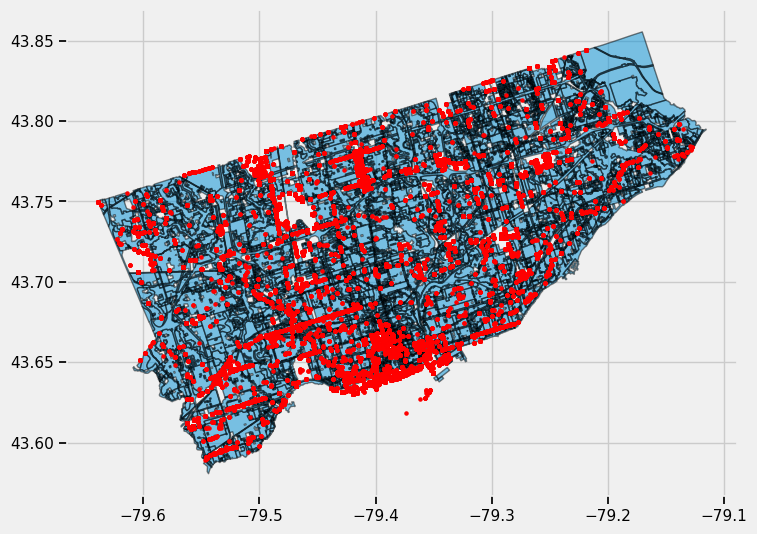

In [230]:
unmatched_points = combined_data[combined_data['GEN_ZONE'].isnull()]

ax = zoning_data.plot(figsize=(12, 6), alpha=0.5, edgecolor='black')
unmatched_points.plot(ax=ax, color='red', markersize=5)
plt.show()

In [240]:
combined_data_cleaned = combined_data.dropna(subset=['GEN_ZONE'])
combined_data_cleaned = combined_data_cleaned.drop(columns=['index_right'], errors='ignore')

In [242]:
combined_data_cleaned.shape

(166970, 12)

In [244]:
combined_data_cleaned.head()

,DATE,HOUR,LONGITUDE,LATITUDE,Year,Month,Day Of Week,TIME_OF_DAY,AREA_L_CD,AREA_NAME,geometry,GEN_ZONE
1,2019-01-01,15,-79.298106,43.781057,2019,1,Tuesday,Afternoon (12 PM - 5 PM),22,Scarborough-Agincourt,POINT (-79.29811 43.78106),Residential Apartment
2,2019-01-01,4,-79.411207,43.665137,2019,1,Tuesday,Night (9 PM - 5 AM),11,University-Rosedale,POINT (-79.41121 43.66514),Commercial Residential
5,2019-01-01,13,-79.537727,43.718786,2019,1,Tuesday,Afternoon (12 PM - 5 PM),07,Humber River-Black Creek,POINT (-79.53773 43.71879),Residential
9,2019-01-01,7,-79.560010,43.646340,2019,1,Tuesday,Morning (5 AM - 12 PM),02,Etobicoke Centre,POINT (-79.56001 43.64634),Residential
11,2019-01-01,0,-79.398978,43.646044,2019,1,Tuesday,Night (9 PM - 5 AM),10,Spadina-Fort York,POINT (-79.39898 43.64604),Commercial Residential Employment


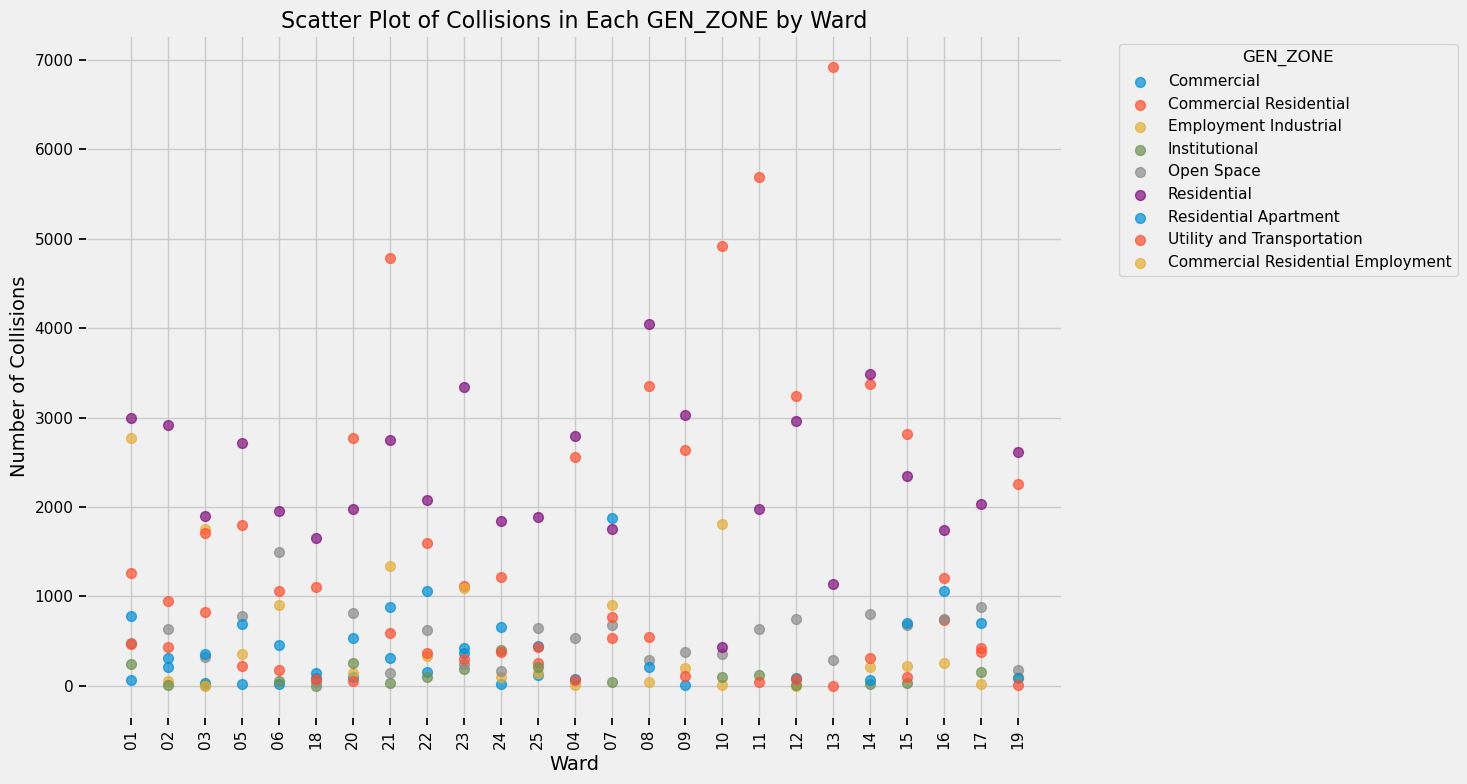

In [284]:
# Prepare the data
grouped_data = combined_data_cleaned.groupby(['AREA_L_CD', 'GEN_ZONE']).size().reset_index(name='Collision_Count')

# Create scatter plot
plt.figure(figsize=(15, 8))
for gen_zone in grouped_data['GEN_ZONE'].unique():
    zone_data = grouped_data[grouped_data['GEN_ZONE'] == gen_zone]
    plt.scatter(zone_data['AREA_L_CD'], zone_data['Collision_Count'], label=gen_zone, s=50, alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Collisions in Each GEN_ZONE by Ward', fontsize=16)
plt.xlabel('Ward', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.legend(title='GEN_ZONE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()